**Group Members and Matric Number**

### Yunus Tijani - 30007210
### Reza Tajadod - 30007365


## **Introduction**

For this project, We are exploring a dataset containing detailed records of flights departing from the three main New York City airports in 2023, along with metadata on airlines, airports, weather, and planes. The primary focus of our analysis is to uncover patterns, trends, and insights within the dataset while addressing key questions related to flight delays and cancellations. My analysis will also involve building predictive models to forecast flight delays and classify flight cancellations using supervised learning techniques.

Before diving into the specifics of this project, let’s briefly discuss the concept of **Data Analytics**. Data Analytics is the process of cleaning, transforming, and analyzing raw data to extract meaningful insights that support decision-making. This process often involves generating visualizations such as charts, graphs, and tables to effectively communicate findings. Data Analytics is a critical tool for identifying trends, improving operational efficiency, and reducing uncertainty in decision-making.

This project is structured into several key tasks. The first task focuses on **data cleaning**, where I ensure the dataset is free from inconsistencies, missing values, or outliers that could compromise the analysis. Next, I conduct an **exploratory data analysis (EDA)** to understand the relationships between various features and identify factors influencing flight delays and cancellations. Following this, I preprocess the data by encoding categorical variables and scaling numerical features to prepare it for modeling.

The second part of the project involves applying supervised learning techniques to address two specific objectives:
1. **Regression Analysis**: Predicting a continuous target variable (e.g., arrival delay) using features such as departure delay, distance, air time, weather conditions, and more.
2. **Classification Analysis**: Categorizing flights as canceled or not canceled by deriving a binary target variable based on flight delay information.

Throughout the project, we employed various Python libraries such as pandas for data manipulation, seaborn and matplotlib for visualization, scikit-learn for machine learning models, and other tools to streamline the analysis process. We also evaluated the performance of our predictive models using appropriate metrics for both regression (e.g., RMSE and R-squared) and classification (e.g., accuracy and F1-score).

This project aims to provide a comprehensive understanding of how different factors influence flight operations while enhancing my skills in data cleaning, exploratory analysis, feature engineering, and supervised learning. I welcome any comments or feedback on this project as I embark on this exciting journey through data!

# **Background**

The dataset for this project contains comprehensive information about flights departing from the three main New York City airports (JFK, LaGuardia, and Newark) in 2023, along with associated metadata. This rich dataset encompasses a wide range of attributes related to flight operations, weather conditions, aircraft specifications, and airline information. Each of these factors contributes to the complex dynamics of flight performance, including potential delays and cancellations.

The dataset is composed of five main CSV files, each providing unique and interconnected information:

1. Flights: This core dataset contains detailed records of individual flights, including departure and arrival times, delays, flight numbers, and route information.

2. Weather: This file provides hourly weather data for each airport, including temperature, wind speed, precipitation, and visibility.

3. Planes: This dataset contains specifications for each aircraft, such as manufacturer, model, number of seats, and engine type.

4. Airports: This file includes information about airports, such as location coordinates, altitude, and time zone.

5. Airlines: This dataset provides details about the airlines operating the flights, including carrier codes and full names.

These interconnected datasets allow for a comprehensive analysis of how various factors - from weather conditions to aircraft types - influence flight performance and scheduling.

Key variables of interest include:
- Departure and arrival delays
- Flight cancellations
- Air time and distance
- Weather conditions at departure
- Aircraft specifications
- Carrier information

By analyzing these variables and their relationships, we aim to uncover patterns and build predictive models that can forecast flight delays and classify potential cancellations. This analysis has practical implications for improving flight scheduling, enhancing passenger experience, and optimizing airline operations.

Importing Required Libraries

In [5]:
import pandas as pd  # For data manipulation
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For advanced visualizations
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Data preprocessing
from sklearn.linear_model import LinearRegression  # For regression task
from sklearn.ensemble import RandomForestClassifier  # For classification task
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix


Loading Datasets

In [6]:
# Load datasets with error handling and specific delimiters
flights = pd.read_csv('flights.csv', sep=';')
weather = pd.read_csv('weather.csv', sep=';')
airports = pd.read_csv('airports.csv', sep=';')
planes = pd.read_csv('planes.csv', sep=';')
airlines = pd.read_csv('airlines.csv', sep=';')



Observing our datasets by looking at each top 10 rows

In [7]:
# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

In [8]:
flights.head(10)

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,1,2023,1,1,1.0,2038,203.0,328.0,3,205.0,UA,628,N25201,EWR,SMF,367.0,2500,20,38,2023-01-01 20:00:00
1,2,2023,1,1,18.0,2300,78.0,228.0,135,53.0,DL,393,N830DN,JFK,ATL,108.0,760,23,0,2023-01-01 23:00:00
2,3,2023,1,1,31.0,2344,47.0,500.0,426,34.0,B6,371,N807JB,JFK,BQN,190.0,1576,23,44,2023-01-01 23:00:00
3,4,2023,1,1,33.0,2140,173.0,238.0,2352,166.0,B6,1053,N265JB,JFK,CHS,108.0,636,21,40,2023-01-01 21:00:00
4,5,2023,1,1,36.0,2048,228.0,223.0,2252,211.0,UA,219,N17730,EWR,DTW,80.0,488,20,48,2023-01-01 20:00:00
5,6,2023,1,1,503.0,500,3.0,808.0,815,-7.0,AA,499,N925AN,EWR,MIA,154.0,1085,5,0,2023-01-01 05:00:00
6,7,2023,1,1,520.0,510,10.0,948.0,949,-1.0,B6,996,N2043J,JFK,BQN,192.0,1576,5,10,2023-01-01 05:00:00
7,8,2023,1,1,524.0,530,-6.0,645.0,710,-25.0,AA,981,N918AN,EWR,ORD,119.0,719,5,30,2023-01-01 05:00:00
8,9,2023,1,1,537.0,520,17.0,926.0,818,68.0,UA,206,N13113,EWR,IAH,258.0,1400,5,20,2023-01-01 05:00:00
9,10,2023,1,1,547.0,545,2.0,845.0,852,-7.0,NK,225,N912NK,EWR,FLL,157.0,1065,5,45,2023-01-01 05:00:00


In [9]:
weather.head(10)

,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,1,JFK,2023,1,1,0,NaN,NaN,NaN,0.0,0,0,NaN,NaN,"0,25",2023-01-01 09:00:00
1,2,JFK,2023,1,1,1,NaN,NaN,NaN,190.0,"4,60312","5,2971784336",NaN,NaN,"2,5",2023-01-01 10:00:00
2,3,JFK,2023,1,1,2,NaN,NaN,NaN,190.0,"5,7539","6,621473042",NaN,NaN,"0,25",2023-01-01 11:00:00
3,4,JFK,2023,1,1,3,NaN,NaN,NaN,250.0,"5,7539","6,621473042","0,02",NaN,4,2023-01-01 12:00:00
4,5,JFK,2023,1,1,4,NaN,NaN,NaN,170.0,"8,05546","9,2700622588",NaN,NaN,"0,75",2023-01-01 13:00:00
5,6,JFK,2023,1,1,5,NaN,NaN,NaN,0.0,0,0,NaN,NaN,"0,75",2023-01-01 14:00:00
6,7,JFK,2023,1,1,6,NaN,NaN,NaN,250.0,"9,20624","10,5943568672",NaN,NaN,"0,24",2023-01-01 15:00:00
7,8,JFK,2023,1,1,7,NaN,NaN,NaN,230.0,"9,20624","10,5943568672",NaN,NaN,"0,5",2023-01-01 16:00:00
8,9,JFK,2023,1,1,8,NaN,NaN,NaN,260.0,"11,5078","13,242946084",NaN,NaN,8,2023-01-01 17:00:00
9,10,JFK,2023,1,1,9,NaN,NaN,NaN,250.0,"12,65858","14,5672406924",NaN,NaN,5,2023-01-01 18:00:00


In [10]:
airports.head(10)

,Unnamed: 0,faa,name,lat,lon,alt,tz,dst,tzone
0,1,AAF,Apalachicola Regional Airport,"29,72750092","-85,02749634",20,-5.0,A,America/New_York
1,2,AAP,Andrau Airpark,"29,7224998474","-95,5883026123",79,-6.0,A,America/Chicago
2,3,ABE,Lehigh Valley International Airport,"40,652099609375","-75,440803527832",393,-5.0,A,America/New_York
3,4,ABI,Abilene Regional Airport,"32,4113006592","-99,6819000244",1791,-6.0,A,America/Chicago
4,5,ABL,Ambler Airport,"67,1063","-157,856989",334,-9.0,A,America/Anchorage
5,6,ABQ,Albuquerque International Sunport,"35,040199","-106,609001",5355,-7.0,A,America/Denver
6,7,ABR,Aberdeen Regional Airport,"45,4491004943848","-98,4217987060547",1302,-6.0,A,America/Chicago
7,8,ABY,Southwest Georgia Regional Airport,"31,5354995727539","-84,1945037841797",197,-5.0,A,America/New_York
8,9,ACK,Nantucket Memorial Airport,"41,25310135","-70,06020355",47,-5.0,A,America/New_York
9,10,ACT,Waco Regional Airport,"31,6112995147705","-97,2304992675781",516,-6.0,A,America/Chicago


In [11]:
planes.head(10)

,Unnamed: 0,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,1,N101DQ,2020.0,Fixed wing multi engine,AIRBUS,A321-211,2,199,0,Turbo-fan
1,2,N101DU,2018.0,Fixed wing multi engine,C SERIES AIRCRAFT LTD PTNRSP,BD-500-1A10,2,133,0,Turbo-fan
2,3,N101HQ,2007.0,Fixed wing multi engine,EMBRAER-EMPRESA BRASILEIRA DE,ERJ 170-200 LR,2,80,0,Turbo-fan
3,4,N101NN,2013.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A321-231,2,379,0,Turbo-fan
4,5,N102DN,2020.0,Fixed wing multi engine,AIRBUS,A321-211,2,199,0,Turbo-fan
5,6,N102DU,NaN,Fixed wing multi engine,C SERIES AIRCRAFT LTD PTNRSP,BD-500-1A10,2,133,0,Turbo-fan
6,7,N102HQ,2007.0,Fixed wing multi engine,EMBRAER-EMPRESA BRASILEIRA DE,ERJ 170-200 LR,2,80,0,Turbo-fan
7,8,N102NN,2013.0,Fixed wing multi engine,AIRBUS,A321-231,2,379,0,Turbo-fan
8,9,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,0,Turbo-fan
9,10,N103DU,NaN,Fixed wing multi engine,C SERIES AIRCRAFT LTD PTNRSP,BD-500-1A10,2,133,0,Turbo-fan


In [12]:
airlines.head(10)

,Unnamed: 0,carrier,name
0,1,9E,Endeavor Air Inc.
1,2,AA,American Airlines Inc.
2,3,AS,Alaska Airlines Inc.
3,4,B6,JetBlue Airways
4,5,DL,Delta Air Lines Inc.
5,6,F9,Frontier Airlines Inc.
6,7,G4,Allegiant Air
7,8,HA,Hawaiian Airlines Inc.
8,9,MQ,Envoy Air
9,10,NK,Spirit Air Lines


# **Data Preprocessing**

Now, let's take a closer look at our dataset and explore the shape, variables along with their types. Additionally, we will assess whether any data cleaning is necessary, such as removing null or missing values, dropping unnecessary columns, and considering changes to the data types of variables if needed.

In [13]:
flights.shape

(435352, 20)

In [14]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435352 entries, 0 to 435351
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      435352 non-null  int64  
 1   year            435352 non-null  int64  
 2   month           435352 non-null  int64  
 3   day             435352 non-null  int64  
 4   dep_time        424614 non-null  float64
 5   sched_dep_time  435352 non-null  int64  
 6   dep_delay       424614 non-null  float64
 7   arr_time        423899 non-null  float64
 8   sched_arr_time  435352 non-null  int64  
 9   arr_delay       422818 non-null  float64
 10  carrier         435352 non-null  object 
 11  flight          435352 non-null  int64  
 12  tailnum         433439 non-null  object 
 13  origin          435352 non-null  object 
 14  dest            435352 non-null  object 
 15  air_time        422818 non-null  float64
 16  distance        435352 non-null  int64  
 17  hour      

In [15]:
weather.shape

(26204, 16)

In [16]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26204 entries, 0 to 26203
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26204 non-null  int64  
 1   origin      26204 non-null  object 
 2   year        26204 non-null  int64  
 3   month       26204 non-null  int64  
 4   day         26204 non-null  int64  
 5   hour        26204 non-null  int64  
 6   temp        668 non-null    object 
 7   dewp        668 non-null    object 
 8   humid       668 non-null    object 
 9   wind_dir    24984 non-null  float64
 10  wind_speed  25171 non-null  object 
 11  wind_gust   25171 non-null  object 
 12  precip      1593 non-null   object 
 13  pressure    572 non-null    object 
 14  visib       26180 non-null  object 
 15  time_hour   26204 non-null  object 
dtypes: float64(1), int64(5), object(10)
memory usage: 3.2+ MB


In [17]:
airports.shape

(1251, 9)

In [18]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1251 non-null   int64  
 1   faa         1251 non-null   object 
 2   name        1251 non-null   object 
 3   lat         1251 non-null   object 
 4   lon         1251 non-null   object 
 5   alt         1251 non-null   int64  
 6   tz          1203 non-null   float64
 7   dst         1203 non-null   object 
 8   tzone       1132 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 88.1+ KB


In [19]:
planes.shape

(4840, 10)

In [20]:
planes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4840 entries, 0 to 4839
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    4840 non-null   int64  
 1   tailnum       4840 non-null   object 
 2   year          4751 non-null   float64
 3   type          4840 non-null   object 
 4   manufacturer  4840 non-null   object 
 5   model         4840 non-null   object 
 6   engines       4840 non-null   int64  
 7   seats         4840 non-null   int64  
 8   speed         4840 non-null   int64  
 9   engine        4840 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 378.2+ KB


In [21]:
airlines.shape

(14, 3)

In [22]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  14 non-null     int64 
 1   carrier     14 non-null     object
 2   name        14 non-null     object
dtypes: int64(1), object(2)
memory usage: 464.0+ bytes


NOTE: We have several types of variables, ranging from integers, objects, and floats.

In [23]:
# We would like to see a descriptive analysis of my dataset. For this We use a describe function.

flights.describe()

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,435352.000000,435352.0,435352.000000,435352.000000,424614.000000,435352.000000,424614.000000,423899.000000,435352.000000,422818.000000,435352.000000,422818.000000,435352.000000,435352.000000,435352.000000
mean,217676.500000,2023.0,6.422713,15.736475,1365.698738,1363.634668,13.837372,1496.509204,1551.548744,4.344803,785.155449,141.820258,977.502981,13.351079,28.526755
std,125675.441533,0.0,3.414399,8.767280,498.044482,478.278174,54.313852,550.498310,513.311580,57.868893,497.449962,89.172558,702.857514,4.757556,19.614842
min,1.000000,2023.0,1.000000,1.000000,1.000000,500.000000,-50.000000,1.000000,1.000000,-97.000000,1.000000,18.000000,80.000000,5.000000,0.000000
25%,108838.750000,2023.0,3.000000,8.000000,931.000000,930.000000,-6.000000,1105.000000,1135.000000,-22.000000,364.000000,77.000000,479.000000,9.000000,10.000000
50%,217676.500000,2023.0,6.000000,16.000000,1357.000000,1359.000000,-2.000000,1519.000000,1551.000000,-10.000000,734.000000,121.000000,762.000000,13.000000,29.000000
75%,326514.250000,2023.0,9.000000,23.000000,1804.000000,1759.000000,10.000000,1946.000000,2007.000000,9.000000,1188.000000,177.000000,1182.000000,17.000000,45.000000
max,435352.000000,2023.0,12.000000,31.000000,2400.000000,2359.000000,1813.000000,2400.000000,2359.000000,1812.000000,1972.000000,701.000000,4983.000000,23.000000,59.000000


We observed a wide range of flight distances and durations, suggesting diverse route types. The delay statistics indicate that while most flights experience some delay, there's significant variability, with some extreme cases of long delays. The presence of missing values in departure and arrival times suggests potential cancellations or data recording issues that will need further investigation. The distribution of scheduled departure times across the day provides insights into peak flying hours.

In [24]:
weather.describe()

,Unnamed: 0,year,month,day,hour,wind_dir
count,26204.000000,26204.0,26204.000000,26204.000000,26204.000000,24984.000000
mean,13102.500000,2023.0,6.511449,15.679515,11.501336,188.123199
std,7564.587563,0.0,3.440720,8.772079,6.921984,111.752334
min,1.000000,2023.0,1.000000,1.000000,0.000000,0.000000
25%,6551.750000,2023.0,4.000000,8.000000,6.000000,80.000000
50%,13102.500000,2023.0,7.000000,16.000000,12.000000,200.000000
75%,19653.250000,2023.0,10.000000,23.000000,18.000000,290.000000
max,26204.000000,2023.0,12.000000,31.000000,23.000000,360.000000


The data covers all months, days, and hours, providing a thorough representation of weather conditions. The wind direction data, while mostly complete, has some missing values that may require attention in further analysis. The distribution of wind directions, with a mean around 188 degrees (roughly south-southwest), could be indicative of prevailing wind patterns at the airports. This weather data will be crucial in analyzing how meteorological conditions correlate with flight delays and cancellations, potentially offering valuable insights for predictive modeling.

In [25]:
airports.describe()

,Unnamed: 0,alt,tz
count,1251.000000,1251.000000,1203.000000
mean,626.000000,1121.992006,-6.501247
std,361.276902,1602.521826,1.585277
min,1.000000,-115.000000,-10.000000
25%,313.500000,96.000000,-8.000000
50%,626.000000,551.000000,-6.000000
75%,938.500000,1226.000000,-5.000000
max,1251.000000,9070.000000,8.000000


The wide altitude range suggests the dataset includes airports from various geographical settings, from coastal areas to mountainous regions. The time zone distribution indicates a focus on airports in the Western Hemisphere, particularly in North America. The presence of some missing time zone data might require attention in further analysis. This airport data will be valuable in understanding how geographical and time zone factors might influence flight operations, delays, and cancellations when combined with the flight and weather datasets.

In [26]:
planes.describe()

,Unnamed: 0,year,engines,seats,speed
count,4840.000000,4751.000000,4840.000000,4840.000000,4840.0
mean,2420.500000,2010.158072,2.000413,189.839050,0.0
std,1397.331982,8.370654,0.028748,92.697687,0.0
min,1.000000,1990.000000,1.000000,4.000000,0.0
25%,1210.750000,2002.000000,2.000000,140.000000,0.0
50%,2420.500000,2012.000000,2.000000,182.000000,0.0
75%,3630.250000,2017.000000,2.000000,200.000000,0.0
max,4840.000000,2023.000000,3.000000,563.000000,0.0


The aircraft age distribution suggests regular fleet updates. The consistent zero value for speed is anomalous and may require further investigation or data correction. This planes data will be crucial in analyzing how aircraft characteristics might influence flight performance, potentially offering insights into factors affecting delays or cancellations when combined with the flight data.

In [27]:
airlines.describe()

,Unnamed: 0
count,14.0000
mean,7.5000
std,4.1833
min,1.0000
25%,4.2500
50%,7.5000
75%,10.7500
max,14.0000


It has just a column, hence the brief description

# Checking Datasets for missing values

**Checking Flights Dataset for missing values**

In [28]:
flights.isnull()

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435347,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
435348,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
435349,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
435350,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [29]:
print(flights.isnull().sum())

Unnamed: 0            0
year                  0
month                 0
day                   0
dep_time          10738
sched_dep_time        0
dep_delay         10738
arr_time          11453
sched_arr_time        0
arr_delay         12534
carrier               0
flight                0
tailnum            1913
origin                0
dest                  0
air_time          12534
distance              0
hour                  0
minute                0
time_hour             0
dtype: int64


In [30]:
# Replace missing dep_time and arr_time with 0
flights['dep_time'] = flights['dep_time'].fillna(0)
flights['arr_time'] = flights['arr_time'].fillna(0)

# Create Flight Status column
flights['Flight_Status'] = np.where((flights['dep_time'] == 0) & (flights['arr_time'] == 0), 'Cancelled',
                                    np.where((flights['dep_delay'] > 15) | (flights['arr_delay'] > 15), 'Delayed', 'On Time'))

# Handle dep_delay and arr_delay
flights['dep_delay'] = flights['dep_delay'].fillna(0)
flights['arr_delay'] = flights['arr_delay'].fillna(0)

# Impute missing air_time values
median_air_time = flights.groupby(['origin', 'dest'])['air_time'].transform('median')
flights['air_time'] = flights['air_time'].fillna(median_air_time)

# If there are still missing air_time values, fill with overall median
overall_median_air_time = flights['air_time'].median()
flights['air_time'] = flights['air_time'].fillna(overall_median_air_time)

# Handle missing tailnum
flights['tailnum'] = flights['tailnum'].fillna('Unknown')

# Reset index after processing
flights = flights.reset_index(drop=True)


In [31]:
# Verify the results
print(flights.isnull().sum())

Unnamed: 0        0
year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
time_hour         0
Flight_Status     0
dtype: int64


In [32]:
flights.shape

(435352, 21)

In [33]:
flights.head(10)

,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,Flight_Status
0,1,2023,1,1,1.0,2038,203.0,328.0,3,205.0,UA,628,N25201,EWR,SMF,367.0,2500,20,38,2023-01-01 20:00:00,Delayed
1,2,2023,1,1,18.0,2300,78.0,228.0,135,53.0,DL,393,N830DN,JFK,ATL,108.0,760,23,0,2023-01-01 23:00:00,Delayed
2,3,2023,1,1,31.0,2344,47.0,500.0,426,34.0,B6,371,N807JB,JFK,BQN,190.0,1576,23,44,2023-01-01 23:00:00,Delayed
3,4,2023,1,1,33.0,2140,173.0,238.0,2352,166.0,B6,1053,N265JB,JFK,CHS,108.0,636,21,40,2023-01-01 21:00:00,Delayed
4,5,2023,1,1,36.0,2048,228.0,223.0,2252,211.0,UA,219,N17730,EWR,DTW,80.0,488,20,48,2023-01-01 20:00:00,Delayed
5,6,2023,1,1,503.0,500,3.0,808.0,815,-7.0,AA,499,N925AN,EWR,MIA,154.0,1085,5,0,2023-01-01 05:00:00,On Time
6,7,2023,1,1,520.0,510,10.0,948.0,949,-1.0,B6,996,N2043J,JFK,BQN,192.0,1576,5,10,2023-01-01 05:00:00,On Time
7,8,2023,1,1,524.0,530,-6.0,645.0,710,-25.0,AA,981,N918AN,EWR,ORD,119.0,719,5,30,2023-01-01 05:00:00,On Time
8,9,2023,1,1,537.0,520,17.0,926.0,818,68.0,UA,206,N13113,EWR,IAH,258.0,1400,5,20,2023-01-01 05:00:00,Delayed
9,10,2023,1,1,547.0,545,2.0,845.0,852,-7.0,NK,225,N912NK,EWR,FLL,157.0,1065,5,45,2023-01-01 05:00:00,On Time


**Checking Weather Dataset for missing values**

In [34]:
weather.isnull()

,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,False,False,False,False,False,False,True,True,True,False,False,False,True,True,False,False
1,False,False,False,False,False,False,True,True,True,False,False,False,True,True,False,False
2,False,False,False,False,False,False,True,True,True,False,False,False,True,True,False,False
3,False,False,False,False,False,False,True,True,True,False,False,False,False,True,False,False
4,False,False,False,False,False,False,True,True,True,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26199,False,False,False,False,False,False,True,True,True,False,False,False,True,True,False,False
26200,False,False,False,False,False,False,True,True,True,False,False,False,True,True,False,False
26201,False,False,False,False,False,False,True,True,True,False,False,False,True,True,False,False
26202,False,False,False,False,False,False,True,True,True,False,False,False,True,True,False,False


In [35]:
print(weather.isnull().sum())

Unnamed: 0        0
origin            0
year              0
month             0
day               0
hour              0
temp          25536
dewp          25536
humid         25536
wind_dir       1220
wind_speed     1033
wind_gust      1033
precip        24611
pressure      25632
visib            24
time_hour         0
dtype: int64


In [36]:
# Convert 'time_hour' to datetime, handling inconsistent formats
weather['time_hour'] = pd.to_datetime(weather['time_hour'], format='mixed', errors='coerce')

# Ensure continuous columns are numeric
continuous_columns = ['temp', 'dewp', 'humid', 'precip', 'pressure', 'visib']
for col in continuous_columns:
    weather[col] = pd.to_numeric(weather[col], errors='coerce')

# Set 'time_hour' as the index for time-based interpolation
weather = weather.set_index('time_hour')

# Temporal Interpolation for continuous variables
for col in ['temp', 'dewp', 'humid', 'precip', 'pressure']:
    weather[col] = weather[col].interpolate(method='time')

# Reset the index back to the original form
weather = weather.reset_index()

# Forward and Backward Fill for wind-related variables
for col in ['wind_dir', 'wind_speed', 'wind_gust']:
    weather[col] = weather[col].ffill().bfill()

# Mean Imputation for visibility
weather['visib'] = weather['visib'].fillna(weather['visib'].mean())

# Print final missing value counts
print("\nFinal missing value counts:")
print(weather.isnull().sum())





Final missing value counts:
time_hour        0
Unnamed: 0       0
origin           0
year             0
month            0
day              0
hour             0
temp           390
dewp           393
humid          608
wind_dir         0
wind_speed       0
wind_gust        0
precip         390
pressure      1924
visib            0
dtype: int64


1. **Convert 'time_hour' to Datetime**: This ensures the 'time_hour' column is in a proper datetime format, facilitating time-based operations and interpolation.

2. **Ensure Numeric Data Types**: The specified continuous columns (temperature, dew point, humidity, precipitation, pressure, visibility) are converted to numeric types, with non-numeric values set to NaN, which is crucial for mathematical operations.

3. **Set 'time_hour' as Index**: By setting 'time_hour' as the index, the dataset can utilize time-based interpolation methods effectively.

4. **Temporal Interpolation**: Missing values in continuous variables are filled using time-based interpolation, which is appropriate for weather data due to its temporal nature.

5. **Reset Index**: The index is reset to bring 'time_hour' back as a regular column after interpolation.

6. **Forward and Backward Fill**: For wind-related variables, missing values are filled using forward fill (last known value) and backward fill (next known value), which suits the discrete nature of these measurements.

7. **Mean Imputation for Visibility**: Remaining missing visibility values are filled with the mean of the column, appropriate given the relatively low number of missing entries.

Based on the above, we still have missing values. Hence, further cleaning.

In [37]:
# Convert 'time_hour' to datetime, handling inconsistent formats
weather['time_hour'] = pd.to_datetime(weather['time_hour'], errors='coerce')

# Ensure continuous columns are numeric
continuous_columns = ['temp', 'dewp', 'humid', 'precip', 'pressure', 'visib']
for col in continuous_columns:
    weather[col] = pd.to_numeric(weather[col], errors='coerce')

# Set 'time_hour' as the index for time-based operations
weather = weather.set_index('time_hour')

# Calculate humidity from temp and dewp where possible
def calculate_humidity(temp, dewp):
    return 100 * (np.exp((17.625 * dewp) / (243.04 + dewp)) / np.exp((17.625 * temp) / (243.04 + temp)))

weather['humid'] = weather.apply(
    lambda row: calculate_humidity(row['temp'], row['dewp'])
    if pd.notnull(row['temp']) and pd.notnull(row['dewp']) else row['humid'],
    axis=1
)

# Temporal Interpolation for continuous variables
for col in ['temp', 'dewp', 'humid', 'precip', 'pressure']:
    weather[col] = weather[col].interpolate(method='time')

# Use rolling mean for pressure (24-hour window)
weather['pressure'] = weather['pressure'].rolling(window=24, center=True, min_periods=1).mean()

# Forward and Backward Fill for wind-related variables
for col in ['wind_dir', 'wind_speed', 'wind_gust']:
    weather[col] = weather[col].ffill().bfill()

# Mean Imputation for visibility
weather['visib'] = weather['visib'].fillna(weather['visib'].mean())

# Final interpolation to catch any remaining NaNs
weather = weather.interpolate(method='time', limit_direction='both')

# Reset the index back to the original form
weather = weather.reset_index()

# Print final missing value counts
print("\nFinal missing value counts:")
print(weather.isnull().sum())



Final missing value counts:
time_hour     0
Unnamed: 0    0
origin        0
year          0
month         0
day           0
hour          0
temp          0
dewp          0
humid         0
wind_dir      0
wind_speed    0
wind_gust     0
precip        0
pressure      0
visib         0
dtype: int64


<ipython-input-37-b75ccf62fced>:37: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  weather = weather.interpolate(method='time', limit_direction='both')


For further cleaning, we did the following:

---

### 1. **Convert `'time_hour'` to Datetime**  

   The `time_hour` column is converted to a datetime format using `pd.to_datetime`. Any invalid or unparseable dates are replaced with `NaT` (Not a Time) due to `errors='coerce'`. Time-based operations (like interpolation or rolling means) require the data to have a valid `DatetimeIndex` or datetime column. Handling inconsistent formats ensures that further operations do not fail.

---

### 2. **Ensure Continuous Columns are Numeric**  

   Non-numeric values (e.g., strings or errors) in the specified continuous columns are converted to `NaN` using `errors='coerce'`. Continuous variables like temperature, pressure, or visibility need to be numeric for mathematical operations such as interpolation, imputation, and rolling calculations. Ensuring numeric types avoids type-related errors.

---

### 3. **Set `time_hour` as the Index**  

   The `time_hour` column is set as the index of the DataFrame. Time-based operations (like `interpolate(method='time')` and `rolling`) require a `DatetimeIndex`. This step enables the proper execution of those methods.

---

### 4. **Calculate Humidity from Temp and Dewpoint**  

   Humidity is recalculated using temperature (`temp`) and dewpoint (`dewp`) where both values are present. If either value is missing, the original `humid` value is retained. Humidity is derived from the relationship between temperature and dewpoint. This recalculation ensures consistency and fills gaps where possible.

---

### 5. **Temporal Interpolation for Continuous Variables**  

   Missing values in continuous columns are filled using **time-weighted interpolation**. Time-based interpolation considers the datetime index and ensures missing values are filled smoothly by looking at adjacent timestamps.

---

### 6. **Rolling Mean for Pressure (24-Hour Window)**  

   A rolling mean with a 24-hour window is applied to the `pressure` column. The `center=True` option centers the window around each row. The rolling mean smooths out short-term fluctuations in `pressure` while retaining the overall trend. This is useful for reducing noise in the data.

---

### 7. **Forward and Backward Fill for Wind-Related Variables**  
  
   Missing values in wind-related columns are filled using **forward fill (ffill)** and **backward fill (bfill)**. Wind-related variables may have missing values that are more consistent over short time spans. Forward and backward filling ensures gaps are filled without drastic changes.

---

### 8. **Mean Imputation for Visibility**  

   Missing values in `visib` (visibility) are replaced with the column mean. Mean imputation is a simple and effective method for filling missing data when values are randomly missing and no time-based interpolation is needed.

---

### 9. **Final Temporal Interpolation**  


   A final time-based interpolation is performed to ensure no `NaN` values remain in the dataset. This step ensures that any remaining gaps (after earlier operations) are filled using time-weighted interpolation.

---

### 10. **Reset Index**  

   The `DatetimeIndex` (`time_hour`) is reset back as a regular column. After time-based operations are complete, restoring the original structure makes the dataset easier to work with.




**Checking Planes Dataset for missing values**

In [39]:
planes.isnull()

,Unnamed: 0,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
4835,False,False,False,False,False,False,False,False,False,False
4836,False,False,False,False,False,False,False,False,False,False
4837,False,False,False,False,False,False,False,False,False,False
4838,False,False,False,False,False,False,False,False,False,False


In [40]:
print(planes.isnull().sum())

Unnamed: 0       0
tailnum          0
year            89
type             0
manufacturer     0
model            0
engines          0
seats            0
speed            0
engine           0
dtype: int64


From the above, we can see that just the year column has some missing values, hence we shall replace with the mean value of the year.

In [41]:
mean_year = planes['year'].mean()
planes['year'] = planes['year'].fillna(value=mean_year)


In [42]:
print("\nMissing values after handling:")
print(planes.isnull().sum())


Missing values after handling:
Unnamed: 0      0
tailnum         0
year            0
type            0
manufacturer    0
model           0
engines         0
seats           0
speed           0
engine          0
dtype: int64


Now, we have no missing value

**Checking Airlines Dataset for Missing Values**

In [43]:
airlines.isnull()

,Unnamed: 0,carrier,name
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [44]:
print(airlines.isnull().sum())

Unnamed: 0    0
carrier       0
name          0
dtype: int64


Here, we have no missing values

**Checking Missing Values for Airport Dataset**

In [45]:
airports.isnull()

,Unnamed: 0,faa,name,lat,lon,alt,tz,dst,tzone
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
1246,False,False,False,False,False,False,False,False,False
1247,False,False,False,False,False,False,False,False,False
1248,False,False,False,False,False,False,False,False,False
1249,False,False,False,False,False,False,False,False,False


In [46]:
print(airports.isnull().sum())

Unnamed: 0      0
faa             0
name            0
lat             0
lon             0
alt             0
tz             48
dst            48
tzone         119
dtype: int64


In [47]:
!pip install timezonefinder

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 49.7 MB/s eta 0:00:00


In [48]:
import pandas as pd
from timezonefinder import TimezoneFinder

# Convert 'lat' and 'lon' to strings, replace commas with dots
airports['lat'] = airports['lat'].astype(str).str.replace(',', '.', regex=False)
airports['lon'] = airports['lon'].astype(str).str.replace(',', '.', regex=False)

# Convert 'lat' and 'lon' back to numeric
airports['lat'] = pd.to_numeric(airports['lat'], errors='coerce')
airports['lon'] = pd.to_numeric(airports['lon'], errors='coerce')


# Function to get timezone info based on lat/lon
def get_timezone_info(lat, lon):
    tf = TimezoneFinder()
    if pd.notnull(lat) and pd.notnull(lon):
        timezone_str = tf.timezone_at(lat=lat, lng=lon)
        if timezone_str:
            tz = pd.Timestamp.now(tz=timezone_str).utcoffset().total_seconds() / 3600
            dst = 'Y' if abs(tz) != int(abs(tz)) else 'N'
            return tz, dst, timezone_str
    return None, None, None

# Fill missing values for 'tz' and 'dst'
for index, row in airports[airports['tz'].isnull()].iterrows():
    tz, dst, tzone = get_timezone_info(row['lat'], row['lon'])
    if tz is not None:
        airports.loc[index, 'tz'] = tz  # Use loc to avoid FutureWarning
        airports.loc[index, 'dst'] = dst

# Fill any remaining NaNs with mode values
airports.loc[:, 'tz'] = airports['tz'].fillna(airports['tz'].mode()[0])
airports.loc[:, 'dst'] = airports['dst'].fillna(airports['dst'].mode()[0])
airports.loc[:, 'tzone'] = airports['tzone'].fillna(airports['tzone'].mode()[0])

# Print final missing value counts
print(airports.isnull().sum())


Unnamed: 0    0
faa           0
name          0
lat           0
lon           0
alt           0
tz            0
dst           0
tzone         0
dtype: int64


What we did:

1. **Replace Commas in `lat` and `lon`:**
   - The `lat` and `lon` columns are converted to strings, and commas (`','`) are replaced with dots (`'.'`) to standardize decimal formatting.
   - The columns are then converted back to numeric using `pd.to_numeric`, replacing invalid values with `NaN` using `errors='coerce'`.

2. **Define `get_timezone_info` Function:**
   - Takes `lat` and `lon` as inputs.
   - Uses the `TimezoneFinder` library to find the timezone.
   - Calculates the offset (`tz`) and checks for daylight saving time (`dst`).

3. **Fill Missing `tz` and `dst`:**
   - Iterates through rows where `tz` is missing.
   - Uses `get_timezone_info` to compute and update `tz` and `dst` values.

4. **Handle Remaining Missing Values:**
   - Any remaining `NaN` values in `tz`, `dst`, and `tzone` are filled with the **mode** (most common value) of their respective columns.

5. **Output Missing Value Summary:**
   - Prints the count of missing values after the cleaning and filling process.



Hence, no missing values anymore

**Removing** **Duplicates**

In [49]:
flights.drop_duplicates(inplace=True)
weather.drop_duplicates(inplace=True)
planes.drop_duplicates(inplace=True)
airports.drop_duplicates(inplace=True)
airlines.drop_duplicates(inplace=True)


**Verifying Cleaned Datasets**

In [50]:
# Verify cleaned datasets
print("Flights dataset after cleaning:", flights.shape)
print("Weather dataset after cleaning:", weather.shape)
print("Planes dataset after cleaning:", planes.shape)
print("Airports dataset after cleaning:", airports.shape)
print("Airlines dataset after cleaning:", airlines.shape)


Flights dataset after cleaning: (435352, 21)
Weather dataset after cleaning: (26204, 16)
Planes dataset after cleaning: (4840, 10)
Airports dataset after cleaning: (1251, 9)
Airlines dataset after cleaning: (14, 3)


# **Merge Datasets for Analysis**

In [51]:
# Clean column names by stripping whitespace and removing unwanted characters
flights.columns = flights.columns.str.replace(';', '').str.replace('"', '').str.strip()
planes.columns = planes.columns.str.replace(';', '').str.replace('"', '').str.strip()
airlines.columns = airlines.columns.str.replace(';', '').str.replace('"', '').str.strip()
weather.columns = weather.columns.str.replace(';', '').str.replace('"', '').str.strip()
airports.columns = airports.columns.str.replace(';', '').str.replace('"', '').str.strip()

# Check cleaned column names again
print("Cleaned Flights columns:", flights.columns)


Cleaned Flights columns: Index(['Unnamed: 0', 'year', 'month', 'day', 'dep_time', 'sched_dep_time',
       'dep_delay', 'arr_time', 'sched_arr_time', 'arr_delay', 'carrier',
       'flight', 'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour',
       'minute', 'time_hour', 'Flight_Status'],
      dtype='object')


In [52]:
# Step 1: Clean column names (remove spaces, special characters, and ensure lowercase)
def clean_columns(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(r'[;"\s]', '', regex=True)
    return df

flights = clean_columns(flights)
planes = clean_columns(planes)
airlines = clean_columns(airlines)
weather = clean_columns(weather)
airports = clean_columns(airports)

# Step 2: Remove any unnamed columns (e.g., 'unnamed: 0')
for df in [flights, planes, airlines, weather, airports]:
    df.drop(columns=[col for col in df.columns if 'unnamed' in col], inplace=True, errors='ignore')

# Step 3: Convert 'time_hour' to datetime format in both DataFrames
flights['time_hour'] = pd.to_datetime(flights['time_hour'], errors='coerce')
weather['time_hour'] = pd.to_datetime(weather['time_hour'], errors='coerce')

# Step 4: Merge flights with planes on 'tailnum'
flights_planes = flights.merge(planes, on='tailnum', how='left')

flights_planes = flights.merge(planes, on='tailnum', how='left')
print(f"Shape after merging flights with planes: {flights_planes.shape}")


# Step 5: Merge with airlines on 'carrier'
flights_planes_airlines = flights_planes.merge(airlines, on='carrier', how='left')

flights_planes_airlines = flights_planes.merge(airlines, on='carrier', how='left')
print(f"Shape after merging with airlines data: {flights_planes_airlines.shape}")


# Step 6: Merge with weather using 'origin' and 'time_hour'
flights_weather = flights_planes_airlines.merge(
    weather,
    on=['origin', 'time_hour'],
    how='left'
)

flights_weather = flights_planes_airlines.merge(
    weather,
    on=['origin', 'time_hour'],
    how='left'
)
print(f"Shape after merging with weather data: {flights_weather.shape}")


# Step 7: Merge with airports dataset twice
# - First for origin airport
merged_with_origin = flights_weather.merge(
    airports,
    left_on='origin',
    right_on='faa',
    how='left',
    suffixes=('', '_origin')
)

merged_with_origin = flights_weather.merge(
    airports,
    left_on='origin',
    right_on='faa',
    how='left',
    suffixes=('', '_origin')
)
print(f"Shape after merging with origin airports: {merged_with_origin.shape}")


# - Then for destination airport
airports_dest = airports.rename(columns=lambda col: f"{col}_dest" if col != 'faa' else col)
final_merged_df = merged_with_origin.merge(
    airports_dest,
    left_on='dest',
    right_on='faa',
    how='left'
)


final_merged_df = merged_with_origin.merge(
    airports_dest,
    left_on='dest',
    right_on='faa',
    how='left'
)
print(f"Shape of the final merged DataFrame: {final_merged_df.shape}")


# Step 8: Drop redundant columns
final_merged_df.drop(columns=['faa'], errors='ignore', inplace=True)




Shape after merging flights with planes: (435352, 28)
Shape after merging with airlines data: (435352, 29)
Shape after merging with weather data: (435352, 42)
Shape after merging with origin airports: (435352, 50)
Shape of the final merged DataFrame: (435352, 58)


In [53]:
# Missing values summary
print("\nMissing Values Summary:")
print(final_merged_df.isnull().sum())


Missing Values Summary:
year_x                0
month_x               0
day_x                 0
dep_time              0
sched_dep_time        0
dep_delay             0
arr_time              0
sched_arr_time        0
arr_delay             0
carrier               0
flight                0
tailnum               0
origin                0
dest                  0
air_time              0
distance              0
hour_x                0
minute                0
time_hour             0
flight_status         0
year_y            11284
type              11284
manufacturer      11284
model             11284
engines           11284
seats             11284
speed             11284
engine            11284
name                  0
year                894
month_y             894
day_y               894
hour_y              894
temp                894
dewp                894
humid               894
wind_dir            894
wind_speed          894
wind_gust           894
precip              894
pressure       

In [54]:
final_merged_df.shape

(435352, 58)

In [55]:
# Function to remove commas and convert to numeric
def remove_commas_and_convert(df, columns):
    for col in columns:
        # Remove commas and convert to float
        df[col] = df[col].replace({',': ''}, regex=True)
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, set invalid parsing to NaN
    return df

# List of columns that may contain commas (you can adjust this based on your dataset)
columns_with_commas = ['wind_speed', 'wind_gust', 'distance', 'temp', 'precip', 'pressure', 'visib', 'lat', 'lon', 'alt']

# Apply the function to remove commas and convert to numeric
final_merged_df = remove_commas_and_convert(final_merged_df, columns_with_commas)

# Check the first few rows to verify
print(final_merged_df.head())


   year_x  month_x  day_x  dep_time  sched_dep_time  dep_delay  arr_time  \
0    2023        1      1       1.0            2038      203.0     328.0   
1    2023        1      1      18.0            2300       78.0     228.0   
2    2023        1      1      31.0            2344       47.0     500.0   
3    2023        1      1      33.0            2140      173.0     238.0   
4    2023        1      1      36.0            2048      228.0     223.0   

   sched_arr_time  arr_delay carrier  flight tailnum origin dest  air_time  \
0               3      205.0      UA     628  N25201    EWR  SMF     367.0   
1             135       53.0      DL     393  N830DN    JFK  ATL     108.0   
2             426       34.0      B6     371  N807JB    JFK  BQN     190.0   
3            2352      166.0      B6    1053  N265JB    JFK  CHS     108.0   
4            2252      211.0      UA     219  N17730    EWR  DTW      80.0   

   distance  hour_x  minute           time_hour flight_status  year_y  \
0

In [56]:
# Drop NaNs or fill them with appropriate values
numeric_columns = final_merged_df.select_dtypes(include=[np.number]).columns
print(numeric_columns)
final_merged_df = final_merged_df.dropna(subset=numeric_columns)  # Drop rows with NaN in numeric columns


Index(['year_x', 'month_x', 'day_x', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'flight', 'air_time',
       'distance', 'hour_x', 'minute', 'year_y', 'engines', 'seats', 'speed',
       'year', 'month_y', 'day_y', 'hour_y', 'temp', 'dewp', 'humid',
       'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib',
       'lat', 'lon', 'alt', 'tz', 'lat_dest', 'lon_dest', 'alt_dest',
       'tz_dest'],
      dtype='object')


# **Identifying Outliers**


**Using IQR Method**

The IQR method identifies outliers based on the interquartile range. Values below
Q
1
−
1.5
×
I
Q
R
Q1−1.5×IQR or above
Q
3
+
1.5
×
I
Q
R
Q3+1.5×IQR are considered outliers.

In [57]:
# IQR filtering for numeric columns
numeric_columns = final_merged_df.select_dtypes(include=[np.number]).columns

# Identify and remove outliers based on IQR
for col in numeric_columns:
    Q1 = final_merged_df[col].quantile(0.25)
    Q3 = final_merged_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Replace outliers with median (alternative approach to removal)
    final_merged_df[col] = np.where(
        (final_merged_df[col] < lower_bound) | (final_merged_df[col] > upper_bound),
        final_merged_df[col].median(), final_merged_df[col]
    )

print("Remaining rows after IQR filtering:", final_merged_df.shape)


Remaining rows after IQR filtering: (415865, 58)


Visualze Outliers with Boxplot

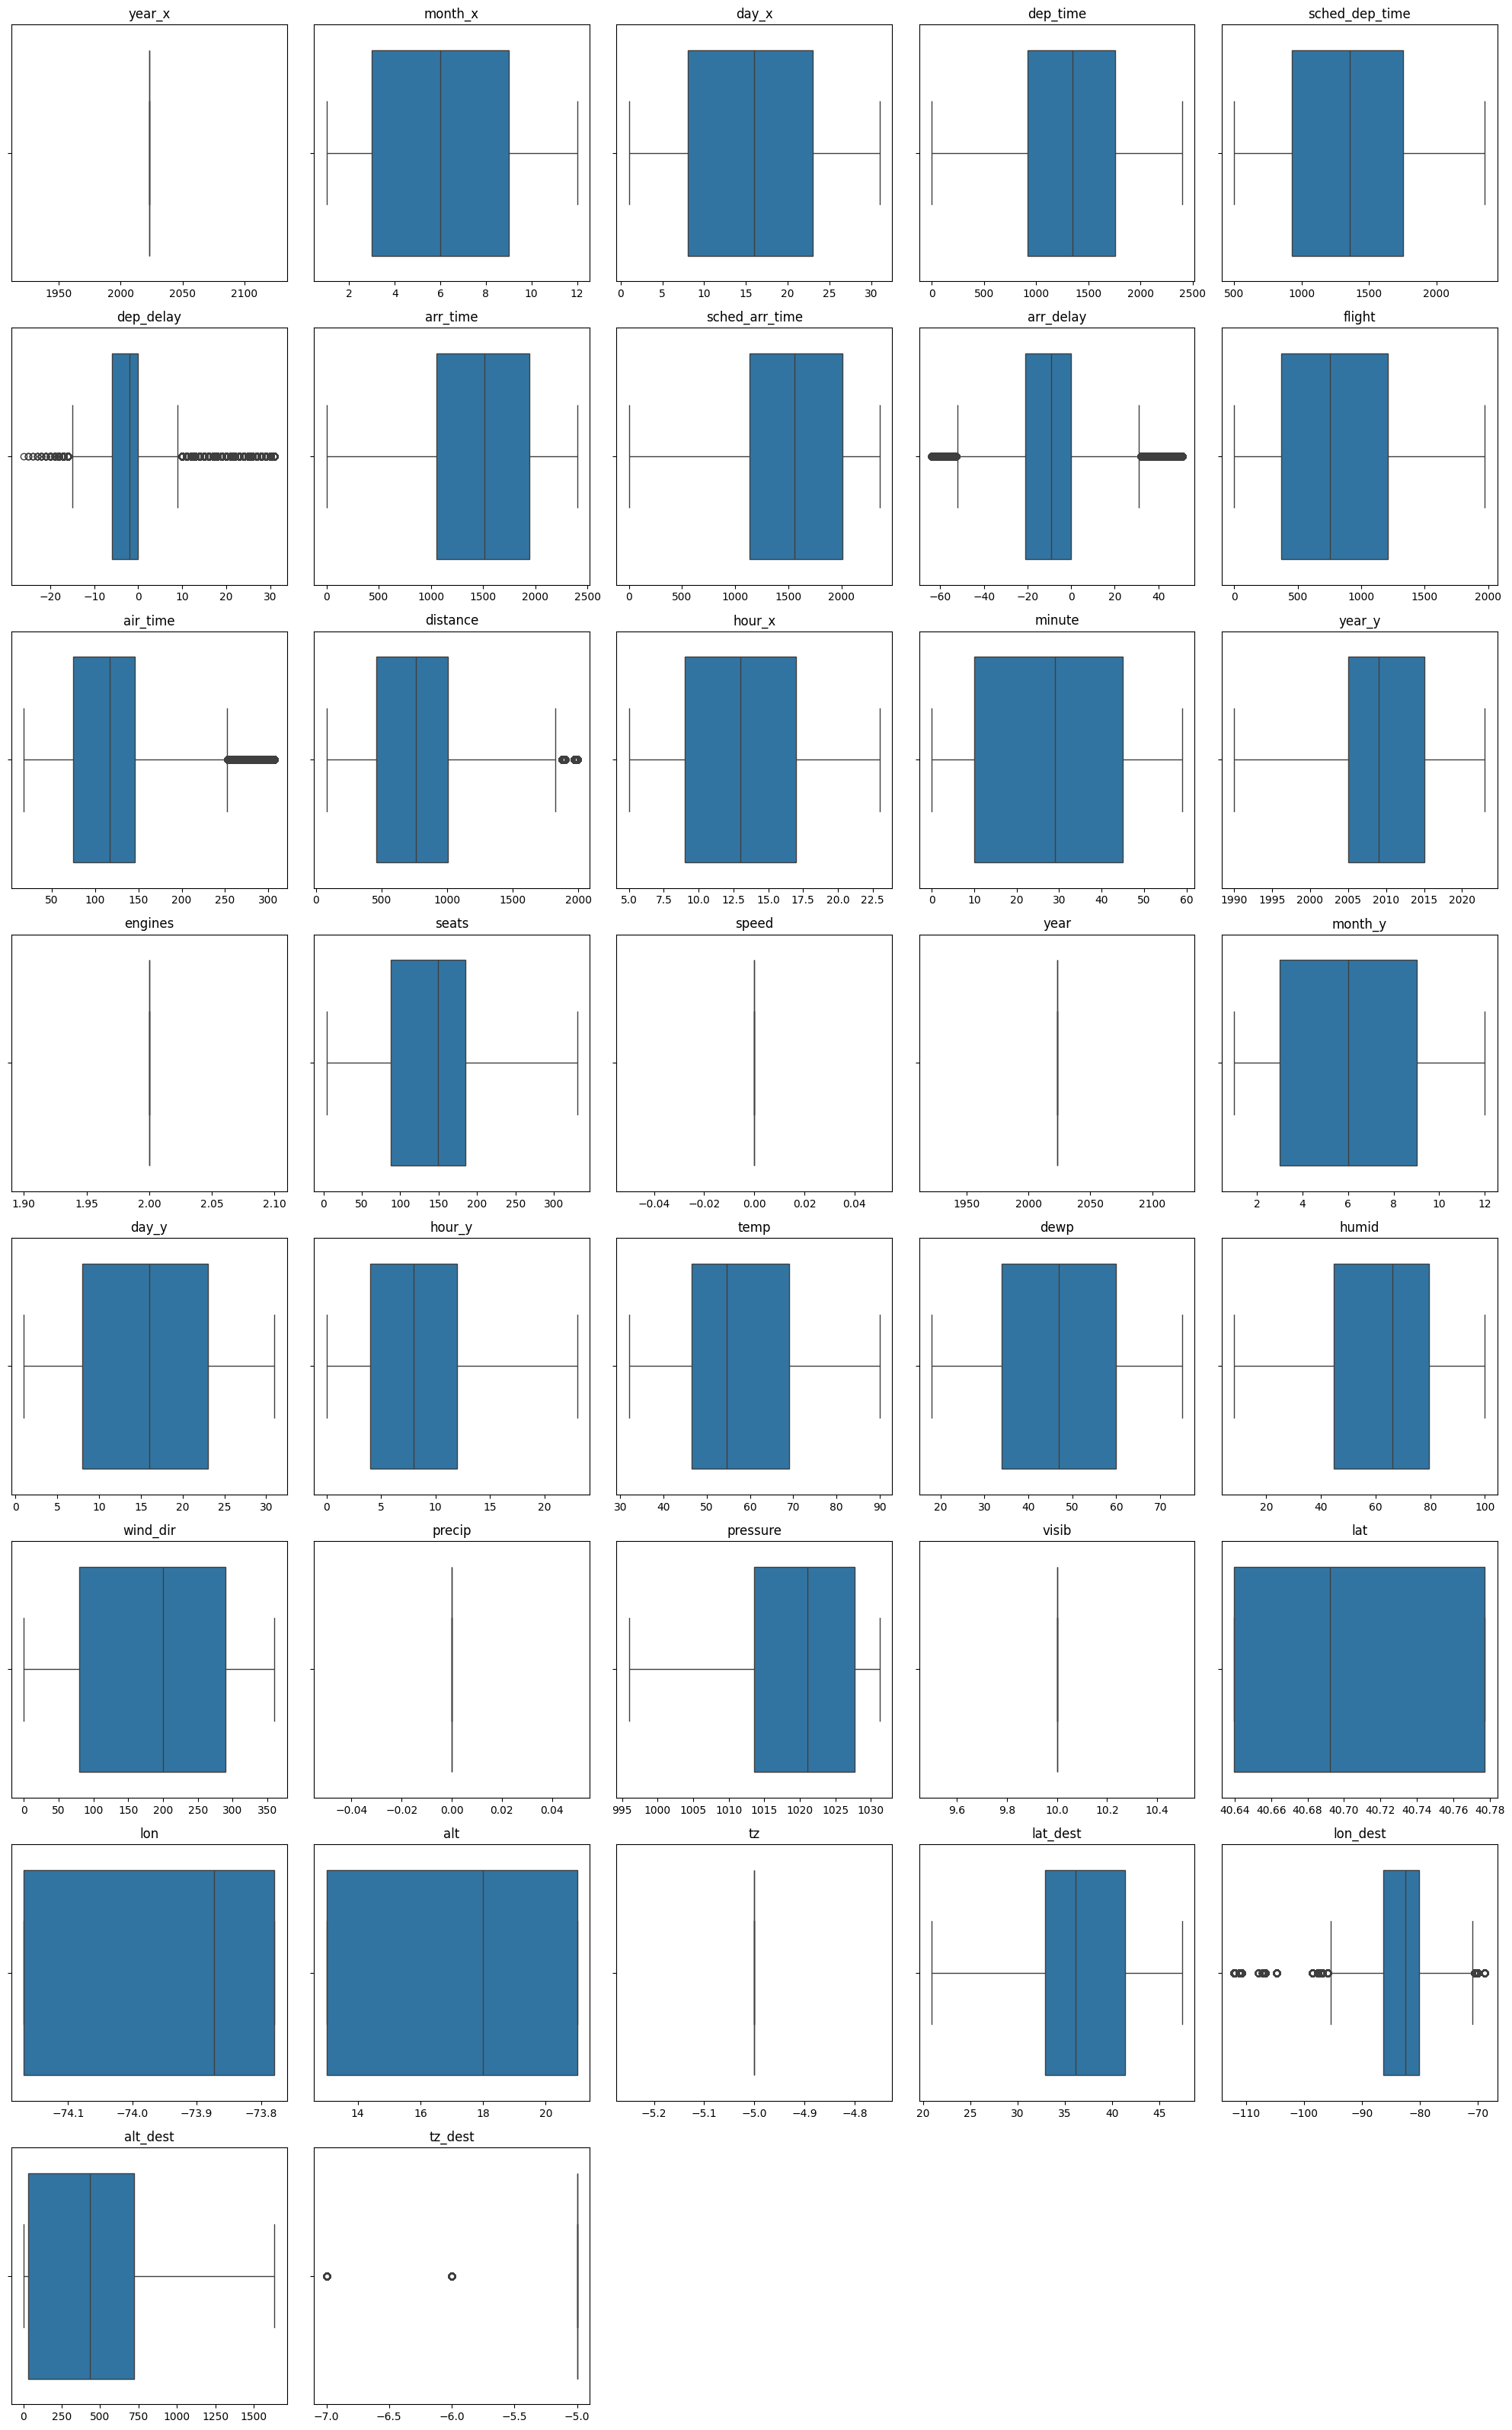

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Specify numerical columns to visualize for outliers
numeric_columns = ['year_x', 'month_x', 'day_x', 'dep_time', 'sched_dep_time', 'dep_delay',
      'arr_time', 'sched_arr_time', 'arr_delay', 'flight', 'air_time',
      'distance', 'hour_x', 'minute', 'year_y', 'engines', 'seats', 'speed',
      'year', 'month_y', 'day_y', 'hour_y', 'temp', 'dewp', 'humid',
      'wind_dir', 'precip', 'pressure', 'visib', 'lat', 'lon', 'alt', 'tz',
      'lat_dest', 'lon_dest', 'alt_dest', 'tz_dest']

# Calculate the number of rows needed
n_cols = 5  # You can adjust this number
n_rows = math.ceil(len(numeric_columns) / n_cols)

# Set up the matplotlib figure
plt.figure(figsize=(20, 4*n_rows))

# Create box plots for each numeric column
for i, col in enumerate(numeric_columns):
   plt.subplot(n_rows, n_cols, i + 1)
   sns.boxplot(x=final_merged_df[col])
   plt.title(f'{col}')
   plt.xlabel('')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


Remove Outliers

In [59]:

# Ensure the columns you're working with are numeric
for col in numeric_columns:
    final_merged_df[col] = pd.to_numeric(final_merged_df[col], errors='coerce')

# Remove rows with NaN values, if any
final_merged_df = final_merged_df.dropna(subset=numeric_columns)

# Remove outliers based on IQR method
for col in numeric_columns:
    Q1 = final_merged_df[col].quantile(0.25)
    Q3 = final_merged_df[col].quantile(0.75)
    IQR = Q3 - Q1
    final_merged_df = final_merged_df[~((final_merged_df[col] < (Q1 - 1.5 * IQR)) | (final_merged_df[col] > (Q3 + 1.5 * IQR)))]

In [60]:
final_merged_df.shape

(248111, 58)

In [61]:
# Define columns to drop based on redundancy and missing values
columns_to_drop = [
    'year_y',
    'month_y',
    'day_y',
    'hour_y',
    'name_origin',
    'name_dest', 'faa_x', 'faa_y', 'type', 'engine', 'engines', 'speed', 'dst_dest', 'time_hour', 'year'
]

# Drop columns from the final merged DataFrame
final_merged_df.drop(columns=columns_to_drop, errors='ignore', inplace=True)

# Check the remaining columns after dropping
print("\nRemaining Columns after Dropping:")
print(final_merged_df.columns)

# Optional: Check for missing values again after dropping
print("\nMissing Values Summary after Dropping:")
print(final_merged_df.isnull().sum())



Remaining Columns after Dropping:
Index(['year_x', 'month_x', 'day_x', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour_x', 'minute',
       'flight_status', 'manufacturer', 'model', 'seats', 'name', 'temp',
       'dewp', 'humid', 'wind_dir', 'wind_speed', 'wind_gust', 'precip',
       'pressure', 'visib', 'lat', 'lon', 'alt', 'tz', 'dst', 'tzone',
       'lat_dest', 'lon_dest', 'alt_dest', 'tz_dest', 'tzone_dest'],
      dtype='object')

Missing Values Summary after Dropping:
year_x            0
month_x           0
day_x             0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          0
distance          0
hour_x            0
minute            0
flight_status     0
manuf

<ipython-input-61-4a3ec756ad56>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_merged_df.drop(columns=columns_to_drop, errors='ignore', inplace=True)


In [62]:
final_merged_df.head(10)

,year_x,month_x,day_x,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour_x,minute,flight_status,manufacturer,model,seats,name,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,lat,lon,alt,tz,dst,tzone,lat_dest,lon_dest,alt_dest,tz_dest,tzone_dest
0,2023.0,1.0,1.0,1.0,2038.0,-2.0,328.0,3.0,-9.0,UA,628.0,N25201,EWR,SMF,117.0,762.0,20.0,38.0,Delayed,BOEING,737-824,149.0,United Air Lines Inc.,32.0,18.0,43.375308,220.0,1035702.0,1.191865e+11,0.0,1028.166667,10.0,40.692501,-74.168701,18.0,-5.0,A,America/New_York,38.695400,-82.541801,27.0,-5.0,America/Los_Angeles
1,2023.0,1.0,1.0,18.0,2300.0,-2.0,228.0,135.0,-9.0,DL,393.0,N830DN,JFK,ATL,108.0,760.0,23.0,0.0,Delayed,BOEING,737-932ER,222.0,Delta Air Lines Inc.,32.0,18.0,43.375308,230.0,805546.0,9.270062e+10,0.0,1029.000000,10.0,40.639801,-73.778900,13.0,-5.0,A,America/New_York,33.636700,-84.428101,1026.0,-5.0,America/New_York
3,2023.0,1.0,1.0,33.0,2140.0,-2.0,238.0,2352.0,-9.0,B6,1053.0,N265JB,JFK,CHS,108.0,636.0,21.0,40.0,Delayed,EMBRAER,ERJ 190-100 IGW,20.0,JetBlue Airways,32.0,18.0,43.375308,260.0,920624.0,1.059436e+11,0.0,1029.000000,10.0,40.639801,-73.778900,13.0,-5.0,A,America/New_York,32.898602,-80.040497,46.0,-5.0,America/New_York
4,2023.0,1.0,1.0,36.0,2048.0,-2.0,223.0,2252.0,-9.0,UA,219.0,N17730,EWR,DTW,80.0,488.0,20.0,48.0,Delayed,BOEING,737-724,149.0,United Air Lines Inc.,32.0,18.0,43.375308,220.0,1035702.0,1.191865e+11,0.0,1028.166667,10.0,40.692501,-74.168701,18.0,-5.0,A,America/New_York,42.212399,-83.353401,645.0,-5.0,America/New_York
143,2023.0,1.0,1.0,851.0,900.0,-9.0,1142.0,1217.0,-35.0,B6,586.0,N323JB,LGA,FLL,152.0,1076.0,9.0,0.0,On Time,EMBRAER,ERJ 190-100 IGW,20.0,JetBlue Airways,32.0,18.0,43.375308,0.0,0.0,0.000000e+00,0.0,1019.000000,10.0,40.777199,-73.872597,21.0,-5.0,A,America/New_York,26.072599,-80.152702,9.0,-5.0,America/New_York
146,2023.0,1.0,1.0,853.0,900.0,-7.0,1206.0,1229.0,-23.0,B6,855.0,N828JB,JFK,LAX,117.0,762.0,9.0,0.0,On Time,AIRBUS,A320-232,200.0,JetBlue Airways,32.0,18.0,43.375308,0.0,0.0,0.000000e+00,0.0,1019.000000,10.0,40.639801,-73.778900,13.0,-5.0,A,America/New_York,33.942501,-82.541801,125.0,-5.0,America/Los_Angeles
149,2023.0,1.0,1.0,854.0,900.0,-6.0,1240.0,1248.0,-8.0,AS,12.0,N431AS,JFK,SFO,117.0,762.0,9.0,0.0,On Time,BOEING,737-990ER,222.0,Alaska Airlines Inc.,32.0,18.0,43.375308,0.0,0.0,0.000000e+00,0.0,1019.000000,10.0,40.639801,-73.778900,13.0,-5.0,A,America/New_York,37.618999,-82.541801,13.0,-5.0,America/Los_Angeles
151,2023.0,1.0,1.0,855.0,900.0,-5.0,1256.0,1310.0,-14.0,AA,55.0,N108NN,JFK,SFO,117.0,762.0,9.0,0.0,On Time,AIRBUS INDUSTRIE,A321-231,149.0,American Airlines Inc.,32.0,18.0,43.375308,0.0,0.0,0.000000e+00,0.0,1019.000000,10.0,40.639801,-73.778900,13.0,-5.0,A,America/New_York,37.618999,-82.541801,13.0,-5.0,America/Los_Angeles
153,2023.0,1.0,1.0,855.0,900.0,-5.0,1200.0,1233.0,-33.0,AA,881.0,N316RK,LGA,MIA,158.0,1096.0,9.0,0.0,On Time,BOEING,737-8,185.0,American Airlines Inc.,32.0,18.0,43.375308,0.0,0.0,0.000000e+00,0.0,1019.000000,10.0,40.777199,-73.872597,21.0,-5.0,A,America/New_York,25.793200,-80.290604,8.0,-5.0,America/New_York
156,2023.0,1.0,1.0,859.0,900.0,-1.0,1100.0,1121.0,-21.0,9E,1409.0,N336PQ,JFK,DTW,91.0,509.0,9.0,0.0,On Time,BOMBARDIER INC,CL-600-2D24,95.0,Endeavor Air Inc.,32.0,18.0,43.375308,0.0,0.0,0.000000e+00,0.0,1019.000000,10.0,40.639801,-73.778900,13.0,-5.0,A,America/New_York,42.212399,-83.353401,645.0,-5.0,America/New_York


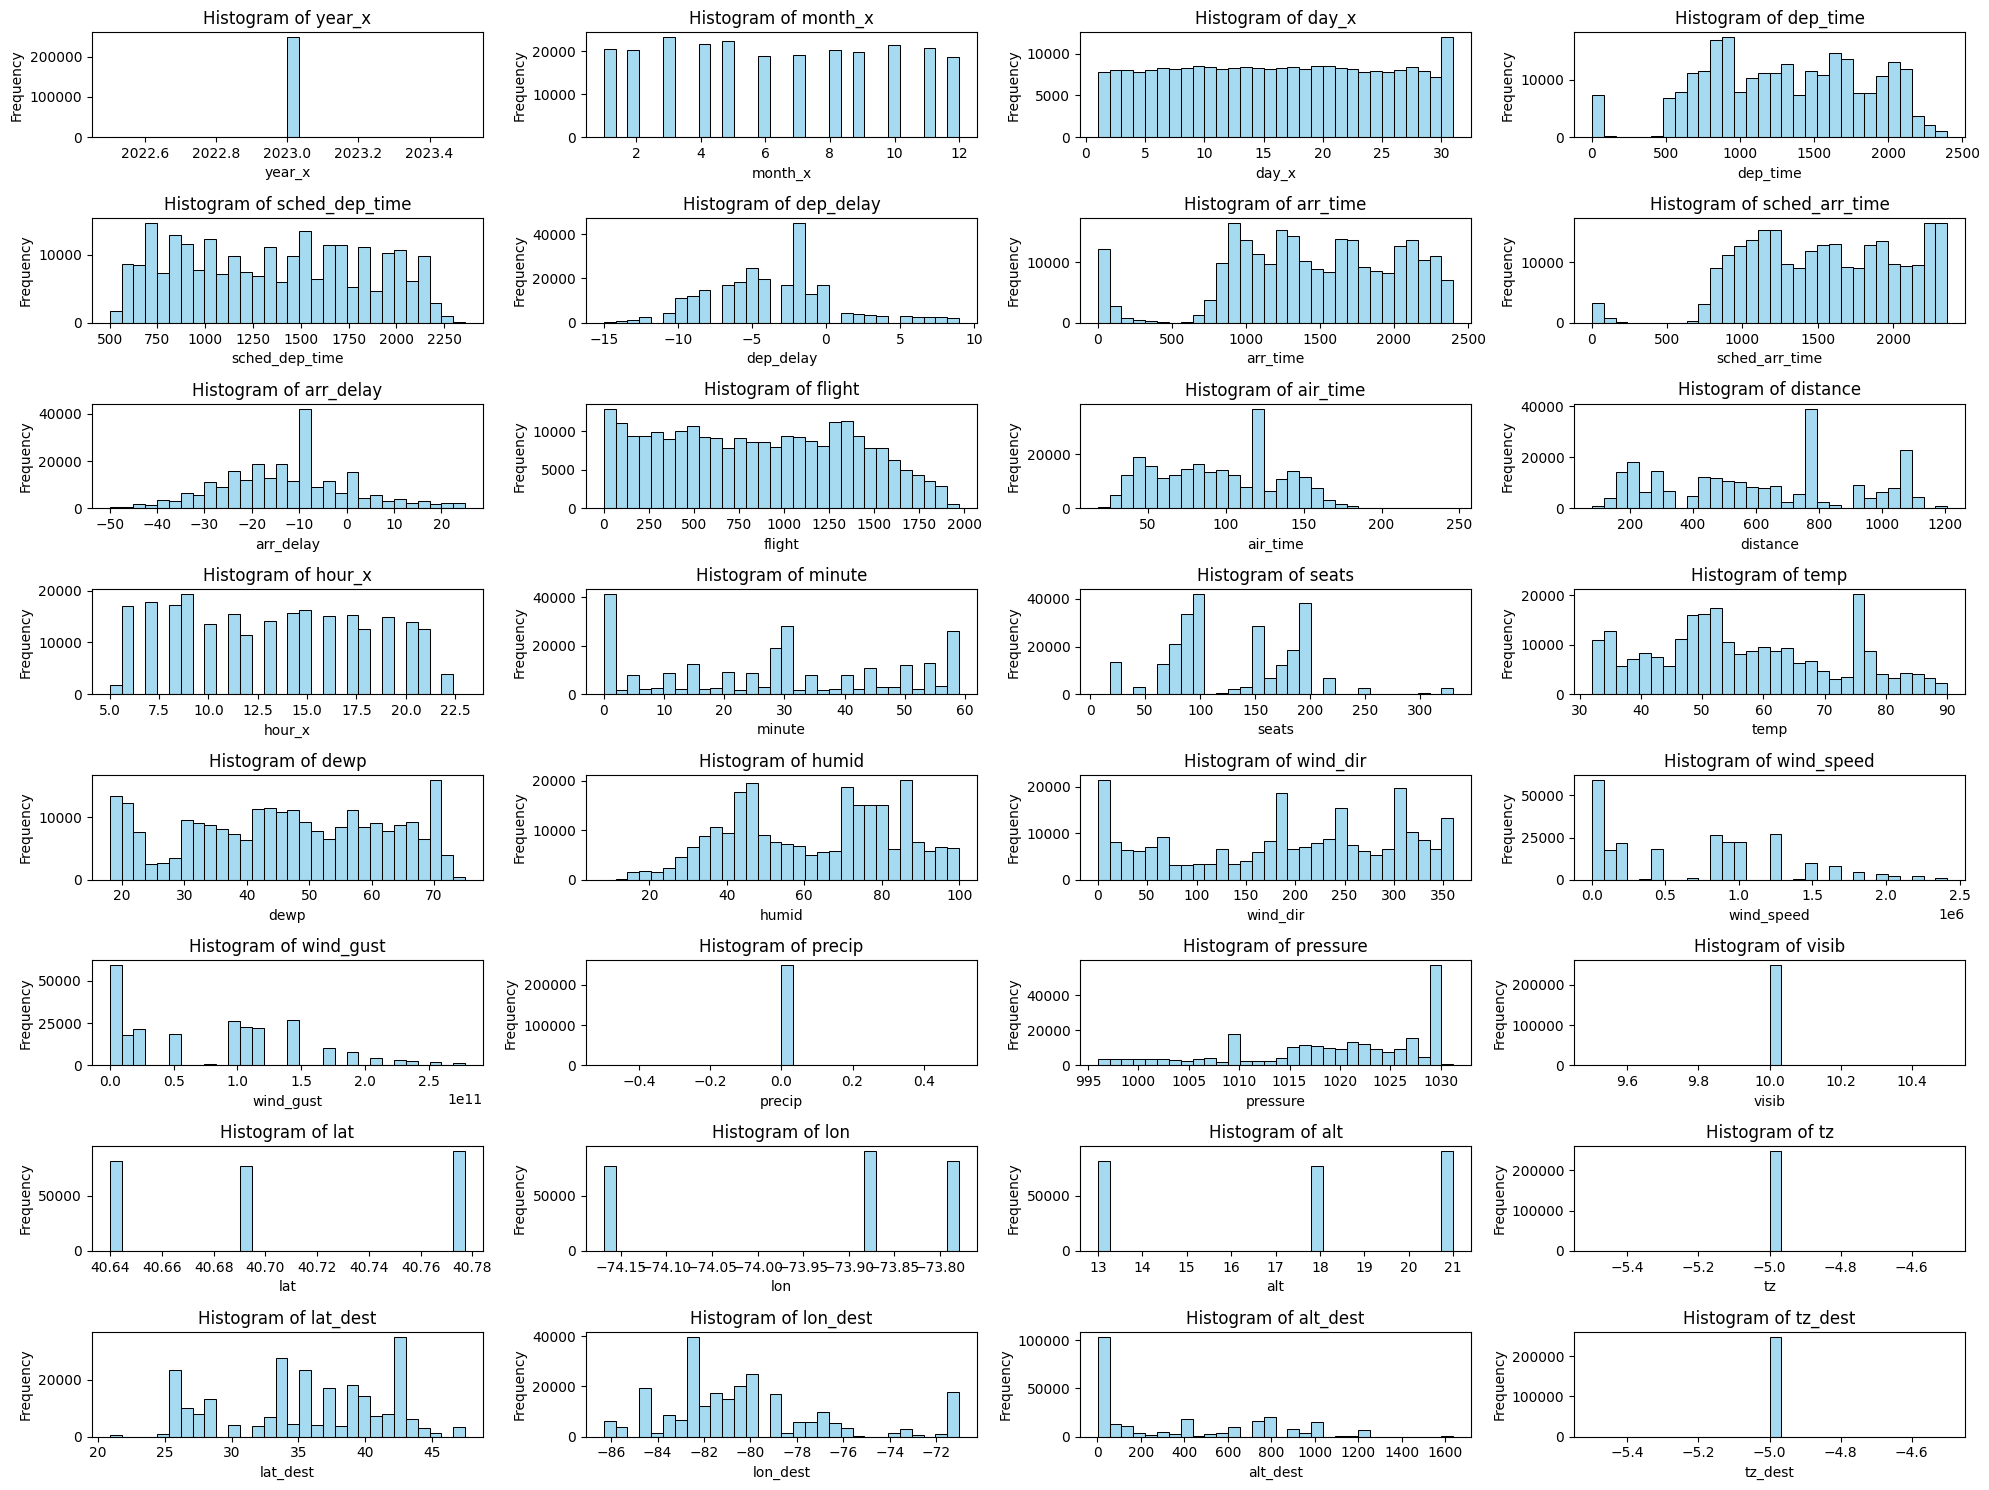

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select numerical columns
numerical_columns = final_merged_df.select_dtypes(include=[np.number]).columns

# Plot histograms for all numerical columns
plt.figure(figsize=(20, 15))  # Adjust figure size to fit multiple plots
for i, col in enumerate(numerical_columns):
   plt.subplot((len(numerical_columns) + 3) // 4, 4, i + 1)  # Arrange subplots in rows and columns
   sns.histplot(final_merged_df[col], kde=False, bins=30, color="skyblue", edgecolor="black")
   plt.title(f"Histogram of {col}")
   plt.xlabel(col)
   plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


**Boxplot for arrival delays by airline**


Purpose:
The boxplot compares the distribution of arrival delays across different airlines to assess performance and reliability.

Key Insights:

Highlights which airlines consistently have longer delays or better punctuality.
Identifies outliers—extreme delays or highly inconsistent performance.
Logic:

The sns.boxplot groups delay data (arr_delay) by airline (carrier).
The box represents the interquartile range (IQR), while whiskers extend to 1.5x IQR, showing the spread of the data.
Interpretation:

A narrow box with short whiskers indicates consistent performance with fewer delays.
Outliers suggest exceptional circumstances or persistent issues requiring further investigation.


<ipython-input-64-58c80bac557e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=final_merged_df, x='carrier', y='arr_delay', palette='coolwarm')


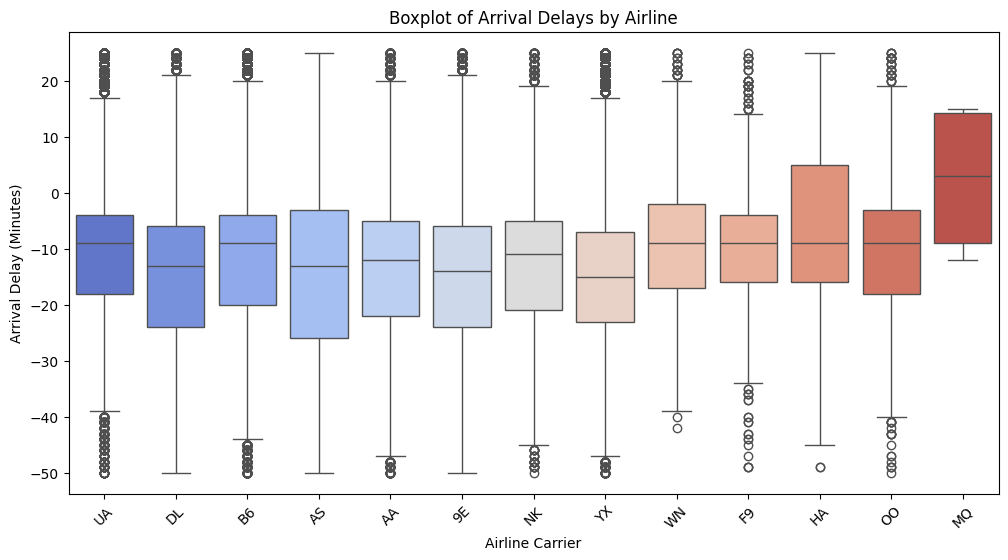

In [64]:
# Boxplot for arrival delays by airline
plt.figure(figsize=(12, 6))
sns.boxplot(data=final_merged_df, x='carrier', y='arr_delay', palette='coolwarm')
plt.title("Boxplot of Arrival Delays by Airline")
plt.xlabel("Airline Carrier")
plt.ylabel("Arrival Delay (Minutes)")
plt.xticks(rotation=45)
plt.show()


 **Heatmap:-Average Arrival Delays by Hour and Day**

Purpose:
The heatmap visualizes how average arrival delays vary by hour of the day and day of the week.

Key Insights:

Helps identify trends in delays, such as specific hours or days with higher-than-average delays.
Useful for understanding operational bottlenecks or peak congestion times at airports.
Logic:

The pivot_table aggregates average arr_delay values grouped by hour (columns) and day (rows).
The sns.heatmap visually represents this aggregated data using color gradients.
Interpretation:

Darker colors indicate lower delays, while brighter colors highlight high delay periods.
Look for patterns like consistent delays during certain hours or days, which can guide schedule adjustments or resource allocation.

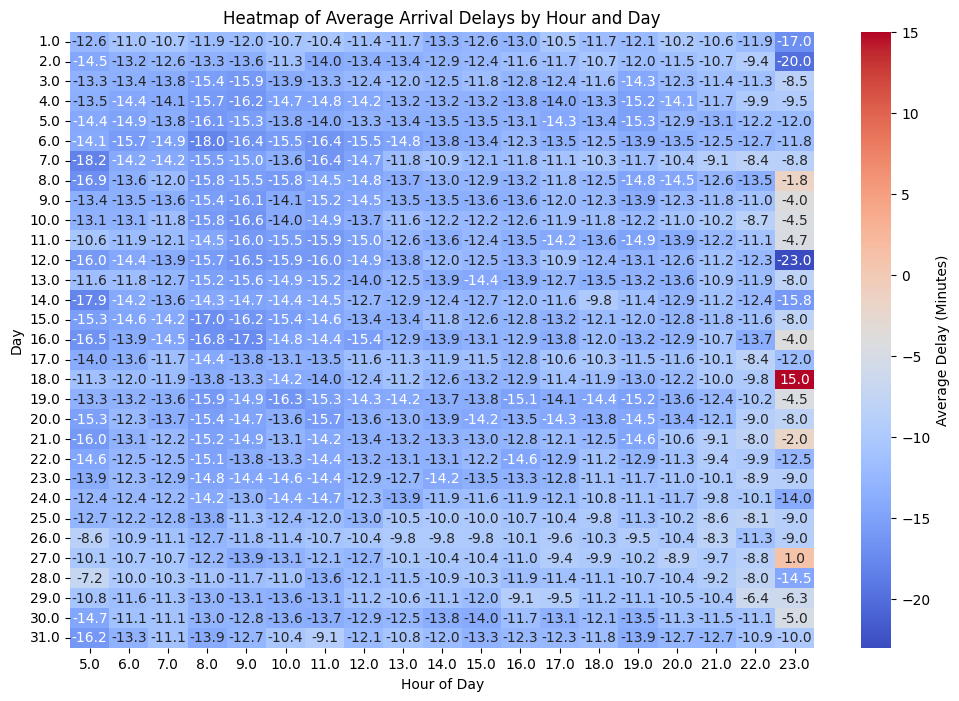

In [67]:
# Create pivot table for heatmap
delay_pivot = final_merged_df.pivot_table(
   index='day_x',
   columns='hour_x',
   values='arr_delay',
   aggfunc='mean'
)

# Check if pivot table is not empty
if not delay_pivot.empty:
    # Plot heatmap
   plt.figure(figsize=(12, 8))
   sns.heatmap(delay_pivot, cmap='coolwarm', annot=True, fmt='.1f', cbar_kws={'label': 'Average Delay (Minutes)'})
   plt.title("Heatmap of Average Arrival Delays by Hour and Day")
   plt.xlabel("Hour of Day")
   plt.ylabel("Day")
   plt.show()
else:
   print("The pivot table for delays is empty. Verify the data and column names.")


**Scatter Plot: Weather Impact on Delays**

Purpose:
The scatter plot examines the relationship between temperature (temp) and arrival delays (arr_delay).

Key Insights:

Identifies how weather conditions, such as extreme temperatures, impact delays.
Useful for predicting delays based on weather forecasts.
Logic:

The scatter plot visualizes individual flights, while a regression line overlays the general trend.
Correlation can indicate whether delays increase (positive slope) or decrease (negative slope) with temperature changes.
Interpretation:

A clear upward trend suggests that higher temperatures are associated with longer delays.
Outliers (e.g., extreme delays) might indicate unusual weather events or operational disruptions.


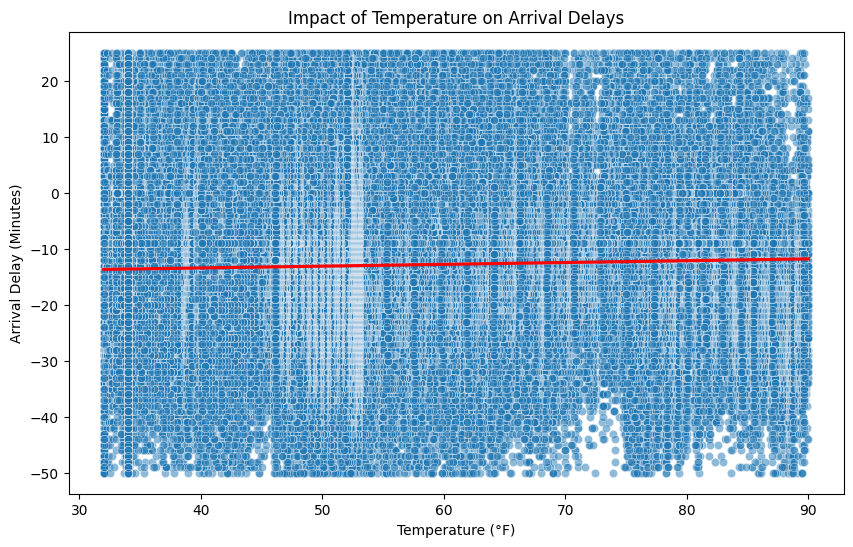

In [68]:
# Scatter plot for temperature vs delay
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_merged_df, x='temp', y='arr_delay', alpha=0.5)
sns.regplot(data=final_merged_df, x='temp', y='arr_delay', scatter=False, color='red')
plt.title("Impact of Temperature on Arrival Delays")
plt.xlabel("Temperature (°F)")
plt.ylabel("Arrival Delay (Minutes)")
plt.show()


**Bar Chart: Number of Flights per Airline**

Purpose:
The bar chart shows the total number of flights operated by each airline, helping assess their scale of operations.

Key Insights:

Indicates the busiest airlines in the dataset.
Useful for correlating airline size with performance metrics (e.g., delays, cancellations).
Logic:

The bar chart is created by counting the number of records for each airline (carrier) in the dataset.
Interpretation:

Taller bars represent airlines with higher flight counts.
Compare operational scale with other metrics, such as delays, to identify patterns.

<ipython-input-69-c0179d4b1ad8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=flight_counts.index, y=flight_counts.values, palette='viridis')


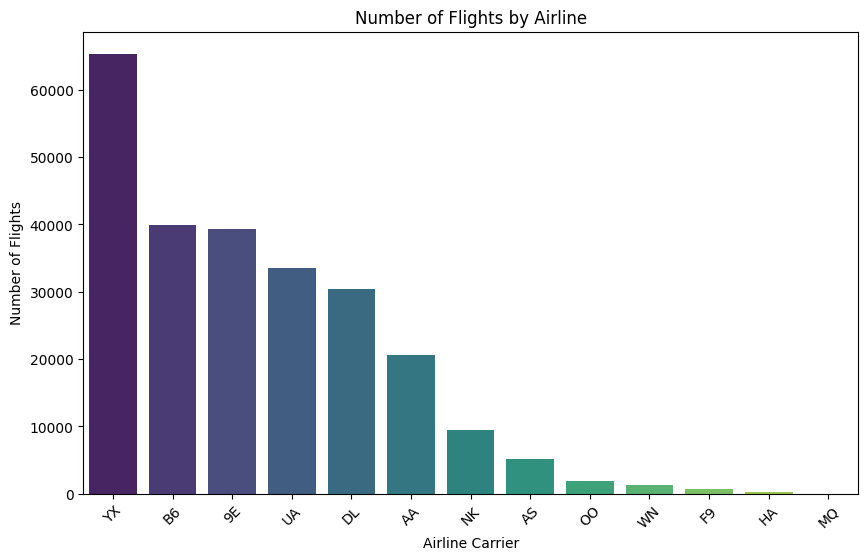

In [69]:
# Bar chart for flight counts by airline
flight_counts = final_merged_df['carrier'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=flight_counts.index, y=flight_counts.values, palette='viridis')
plt.title("Number of Flights by Airline")
plt.xlabel("Airline Carrier")
plt.ylabel("Number of Flights")
plt.xticks(rotation=45)
plt.show()


**Histogram: Distribution of Plane Ages**

Purpose:
The histogram shows the distribution of ages for planes in the fleet, providing insights into the modernization or aging of the aircraft.

Key Insights:

Older planes may contribute to higher delays or maintenance issues.
A younger fleet suggests investments in newer, more efficient aircraft.
Logic:

Plane age is calculated as the difference between the current year (e.g., 2023) and the year of manufacture.
The histogram plots the frequency of planes by age, with a kernel density estimate (KDE) overlay to show the trend.
Interpretation:

Peaks in the histogram indicate common plane ages, while a wider spread suggests diverse fleet age.
Identify clusters of older planes that might require replacements or upgrades.


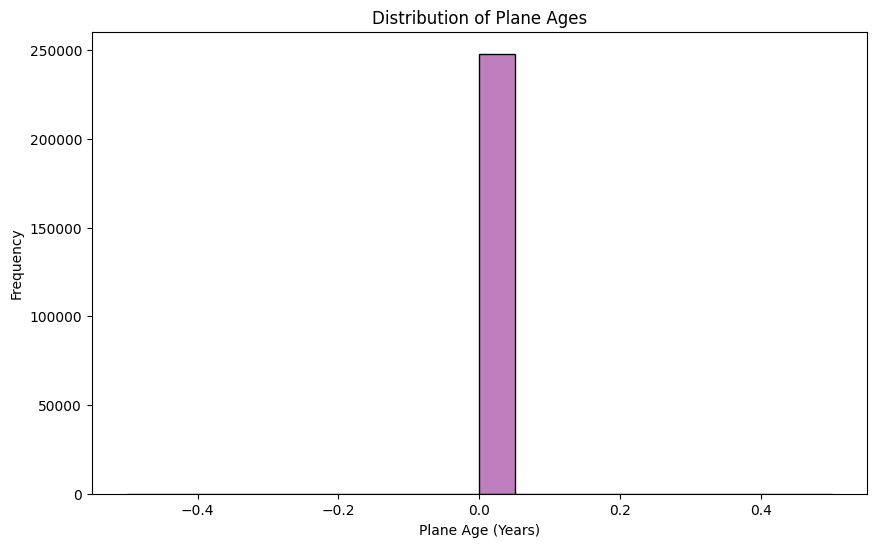

In [70]:
# Ensure 'year_x' or 'year_y' exists and contains numeric data
if 'year_x' in final_merged_df.columns:
    # Calculate plane ages (assuming current year is 2023)
    final_merged_df['plane_age'] = 2023 - final_merged_df['year_x']  # Replace with correct column name

    # Plot histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(final_merged_df['plane_age'], bins=20, kde=True, color='purple')
    plt.title("Distribution of Plane Ages")
    plt.xlabel("Plane Age (Years)")
    plt.ylabel("Frequency")
    plt.show()
else:
    print("The 'year_x' column is missing or invalid. Verify the dataset.")


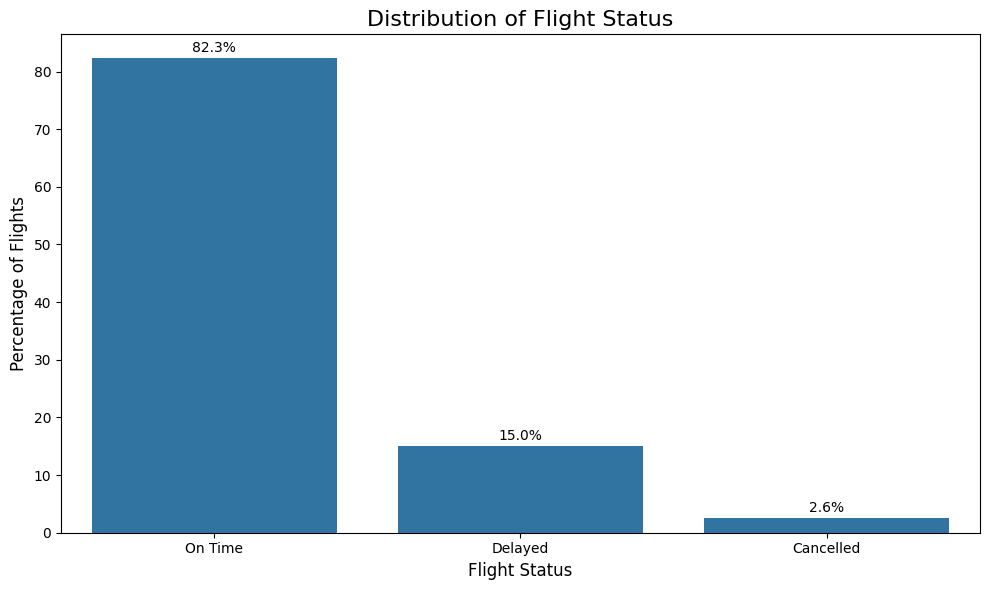

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you've already run the code to prepare the DataFrame 'df'

# Calculate the percentage of each flight status
status_counts = final_merged_df['flight_status'].value_counts(normalize=True) * 100

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=status_counts.index, y=status_counts.values)

# Customize the plot
plt.title('Distribution of Flight Status', fontsize=16)
plt.xlabel('Flight Status', fontsize=12)
plt.ylabel('Percentage of Flights', fontsize=12)

# Add percentage labels on top of each bar
for i, v in enumerate(status_counts.values):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()


In [72]:
final_merged_df['average_speed'] = final_merged_df['distance'] / (final_merged_df['air_time'] / 60)
print(final_merged_df[['carrier', 'average_speed']].groupby('carrier').mean())


         average_speed
carrier               
9E          349.674817
AA          384.693248
AS          390.769231
B6          384.453956
DL          403.231701
F9          417.786744
HA          390.769231
MQ          415.001994
NK          408.242264
OO          304.828259
UA          392.029892
WN          407.319241
YX          336.370445


**Descriptive Statistics**

Purpose:
To summarize the key numerical and categorical features of the dataset, providing an overview of the data distribution, central tendencies, and variability.

Logic:

The describe() function generates basic statistics for each column:
Numerical Columns: Count, mean, standard deviation (std), min, 25th percentile (Q1), median (50th percentile), 75th percentile (Q3), and max.
Categorical Columns: Count, unique values, most frequent value (top), and its frequency (freq).
Key Insights:

Identify the central tendency (mean, median) of numerical features.
Assess variability (standard deviation, range) to detect dispersed data.
Recognize potential issues such as skewed distributions, outliers, or sparse categories.
Interpretation:

Numerical Example: A high standard deviation in arr_delay may indicate widely varying delay durations, suggesting potential operational issues.
Categorical Example: A column with low unique values but a dominant category (high freq) may indicate an imbalance in the data.

In [73]:
# Descriptive statistics
descriptive_stats = final_merged_df.describe(include='all')
print("Descriptive Statistics:")
print(descriptive_stats)


Descriptive Statistics:
          year_x        month_x          day_x       dep_time  sched_dep_time  \
count   248111.0  248111.000000  248111.000000  248111.000000   248111.000000   
unique       NaN            NaN            NaN            NaN             NaN   
top          NaN            NaN            NaN            NaN             NaN   
freq         NaN            NaN            NaN            NaN             NaN   
mean      2023.0       6.412049      15.688756    1310.931220     1351.178747   
std          0.0       3.438877       8.727546     536.907853      478.913571   
min       2023.0       1.000000       1.000000       0.000000      500.000000   
25%       2023.0       3.000000       8.000000     900.000000      929.000000   
50%       2023.0       6.000000      16.000000    1323.000000     1345.000000   
75%       2023.0       9.000000      23.000000    1738.000000     1735.000000   
max       2023.0      12.000000      31.000000    2400.000000     2359.000000   

   

**Specific Measures: Skewness and Kurtosis**

Purpose:
To assess the shape of the data distribution for numerical features, detecting asymmetry (skewness) and the presence of heavy tails or outliers (kurtosis).

Logic:

Skewness: Measures the symmetry of the data distribution:
0 indicates a symmetric distribution.
Positive values suggest right-skewed data (longer tail on the right).
Negative values suggest left-skewed data (longer tail on the left).
Kurtosis: Measures the "tailedness" of the distribution:
Values > 3 indicate heavy tails (more outliers).
Values < 3 indicate light tails (fewer outliers).
Key Insights:

High skewness in arr_delay may indicate delays with a long tail (extreme values).
High kurtosis in distance may suggest routes with extreme lengths compared to the average.
Interpretation:

Skewness Example: If arr_delay has a skewness of 2, most flights arrive close to the scheduled time, but a few have extreme delays.
Kurtosis Example: A kurtosis of 6 for distance suggests a few very long-distance flights skew the distribution.

In [74]:
# Skewness and Kurtosis
specific_measures = {
   'Skewness': final_merged_df.skew(numeric_only=True),
   'Kurtosis': final_merged_df.kurt(numeric_only=True)
}
print("Specific Measures (Skewness & Kurtosis):")
print(specific_measures)


Specific Measures (Skewness & Kurtosis):
{'Skewness': year_x            0.000000
month_x           0.039820
day_x             0.015483
dep_time         -0.177536
sched_dep_time    0.074735
dep_delay         0.431490
arr_time         -0.541887
sched_arr_time   -0.272524
arr_delay         0.186097
flight            0.093577
air_time          0.085705
distance          0.090018
hour_x            0.083937
minute            0.008896
seats             0.346474
temp              0.238991
dewp             -0.141593
humid            -0.114757
wind_dir         -0.269222
wind_speed        0.518700
wind_gust         0.518700
precip            0.000000
pressure         -0.756199
visib             0.000000
lat               0.183552
lon              -0.638227
alt              -0.340147
tz                0.000000
lat_dest         -0.292790
lon_dest          1.051354
alt_dest          0.666175
tz_dest           0.000000
plane_age         0.000000
average_speed    -0.608295
dtype: float64, 'Kurtosis': 

**Value Counts for Categorical Columns**

Purpose:
To determine the frequency of unique values in each categorical column, revealing data distribution and potential imbalances.

Logic:

The value_counts() function computes the frequency of each unique value in a categorical column.
Often used for columns like carrier, origin, or dest.
Key Insights:

Identify dominant categories (e.g., most common airline or airport).
Detect imbalances that could affect analysis or modeling (e.g., underrepresented categories).
Interpretation:

Example: If carrier has one airline making up 70% of flights, this could bias delay analysis toward that airline.
Helps decide whether data balancing techniques (e.g., resampling) are necessary for modeling.

In [75]:
# Value counts for categorical columns
value_counts = {col: final_merged_df[col].value_counts() for col in final_merged_df.select_dtypes(include='object').columns}
print("Value Counts:")
for col, vc in value_counts.items():
    print(f"\n{col}:\n{vc}")


Value Counts:

carrier:
carrier
YX    65356
B6    39879
9E    39353
UA    33574
DL    30476
AA    20572
NK     9446
AS     5217
OO     1944
WN     1328
F9      717
HA      245
MQ        4
Name: count, dtype: int64

tailnum:
tailnum
N490PX    531
N915XJ    523
N491PX    514
N480PX    509
N482PX    493
         ... 
N643UA      1
N429WN      1
N260WN      1
N8569Z      1
N552NW      1
Name: count, Length: 4420, dtype: int64

origin:
origin
LGA    90062
JFK    81140
EWR    76909
Name: count, dtype: int64

dest:
dest
BOS    15783
ATL    13510
MCO    13396
MIA    12702
CLT    11214
       ...  
ANC       58
SBN       21
AGS       16
OGG       13
LEX        1
Name: count, Length: 75, dtype: int64

flight_status:
flight_status
On Time      204284
Delayed       37335
Cancelled      6492
Name: count, dtype: int64

manufacturer:
manufacturer
BOEING                           56848
AIRBUS                           49210
BOMBARDIER INC                   39445
EMBRAER                          34141


**Group Summaries**

Purpose:
To aggregate and analyze numerical features grouped by a categorical column, such as airline or airport, providing targeted insights.

Logic:

The groupby() method aggregates numerical features based on categories:
Mean: Average value per group.
Median: Middle value per group.
Count: Number of records per group.
Sum: Total value per group.
Often used to analyze performance metrics like delays by carrier or origin.
Key Insights:

Compare average delays or flight counts across airlines or airports.
Highlight the best-performing categories (e.g., airlines with the least delays).
Uncover patterns in specific groups that might warrant further investigation.
Interpretation:

Example: If the average arr_delay for carrier A is 5 minutes and carrier B is 30 minutes, carrier A is more reliable.
Variations in flight counts can indicate operational scale differences between airlines or airports.

In [76]:
# Group summaries
group_summary = final_merged_df.groupby('carrier').agg({
   'arr_delay': ['mean', 'median', 'count'], # Replace 'arr_delay' as needed
   'distance': 'mean'
})
print("Group Summaries:")
print(group_summary)


Group Summaries:
         arr_delay                   distance
              mean median  count         mean
carrier                                      
9E      -14.259447  -14.0  39353   432.420222
AA      -12.804589  -12.0  20572   718.567568
AS      -13.971823  -13.0   5217   762.000000
B6      -11.259259   -9.0  39879   738.384664
DL      -13.691757  -13.0  30476   809.905270
F9       -9.591353   -9.0    717   885.283124
HA       -6.669388   -9.0    245   762.000000
MQ        2.250000    3.0      4  1085.000000
NK      -12.220940  -11.0   9446   836.440927
OO      -10.213477   -9.0   1944   342.805041
UA      -10.413117   -9.0  33574   744.644934
WN       -9.228163   -9.0   1328   814.801205
YX      -14.218725  -15.0  65356   409.669181


# **Data Preprocessing**

**Encoding**

In [77]:
from sklearn.preprocessing import LabelEncoder

# Make a copy of the original DataFrame for encoding
final_merged_df_encoded = final_merged_df.copy()

# Identify categorical columns
categorical_columns = final_merged_df.select_dtypes(include=['object']).columns

# Apply Label Encoding
label_encoder = LabelEncoder()
for col in categorical_columns:
    final_merged_df_encoded[col] = label_encoder.fit_transform(final_merged_df[col])

# Confirm encoding
final_merged_df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
Index: 248111 entries, 0 to 434788
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year_x          248111 non-null  float64
 1   month_x         248111 non-null  float64
 2   day_x           248111 non-null  float64
 3   dep_time        248111 non-null  float64
 4   sched_dep_time  248111 non-null  float64
 5   dep_delay       248111 non-null  float64
 6   arr_time        248111 non-null  float64
 7   sched_arr_time  248111 non-null  float64
 8   arr_delay       248111 non-null  float64
 9   carrier         248111 non-null  int64  
 10  flight          248111 non-null  float64
 11  tailnum         248111 non-null  int64  
 12  origin          248111 non-null  int64  
 13  dest            248111 non-null  int64  
 14  air_time        248111 non-null  float64
 15  distance        248111 non-null  float64
 16  hour_x          248111 non-null  float64
 17  minute         

Most machine learning algorithms cannot work with categorical variables directly because they expect numeric input. Label Encoding helps by converting string labels into numbers. For example, a column representing countries (like ['Delayed', 'On Time', 'Cancelled']) will be transformed into [0, 1, 2]. This makes it possible to feed categorical data into machine learning models that require numeric features.

# **Regression Task**

Linear Regression RMSE: 12.0603, R2: 0.2244
Decision Tree Regression RMSE: 13.7902, R2: -0.0140
Random Forest Regression RMSE: 9.5610, R2: 0.5126


Text(0, 0.5, 'Predicted Values')

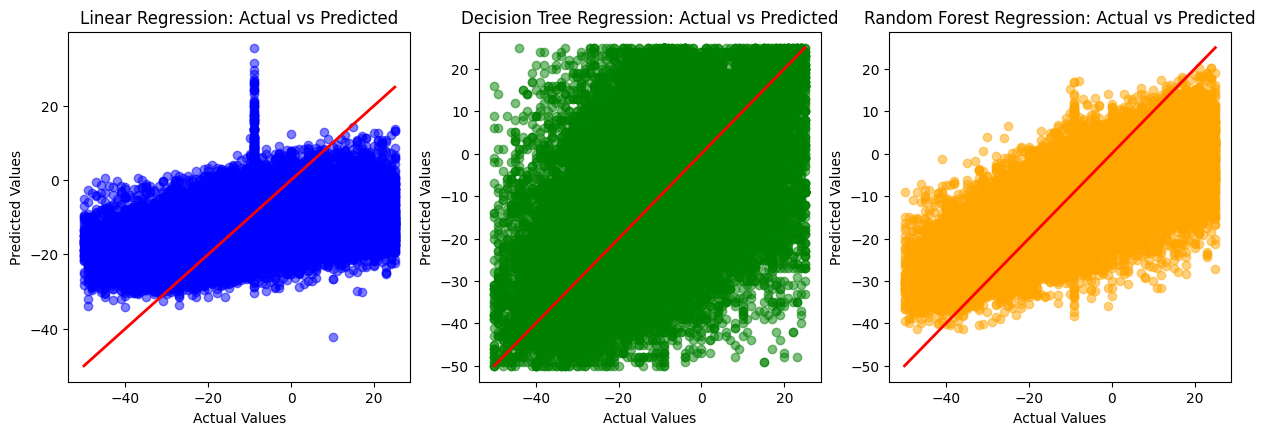

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

# Assuming final_merged_df_encoded is your DataFrame

# Step 1: Select target variable and features
target_column = 'arr_delay'

# Renaming X and y to X_regress and y_regress
X_regress = final_merged_df_encoded.drop(columns=[target_column, 'flight_status'])  # Drop target and categorical target
y_regress = final_merged_df_encoded[target_column]

# Step 2: Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_regress, y_regress, test_size=0.2, random_state=42)

# Step 3: Linear Regression Model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

# Step 4: Decision Tree Regression Model
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_tree = decision_tree.predict(X_test)

# Step 5: Random Forest Regression Model
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)
y_pred_forest = random_forest.predict(X_test)


# Step 8: Evaluate Model Performance
# Linear Regression
linear_rmse = np.sqrt(mean_squared_error(y_test, y_pred_linear))
linear_r2 = r2_score(y_test, y_pred_linear)

# Decision Tree Regression
tree_rmse = np.sqrt(mean_squared_error(y_test, y_pred_tree))
tree_r2 = r2_score(y_test, y_pred_tree)

# Random Forest Regression
forest_rmse = np.sqrt(mean_squared_error(y_test, y_pred_forest))
forest_r2 = r2_score(y_test, y_pred_forest)


# Print performance metrics for all models
print(f"Linear Regression RMSE: {linear_rmse:.4f}, R2: {linear_r2:.4f}")
print(f"Decision Tree Regression RMSE: {tree_rmse:.4f}, R2: {tree_r2:.4f}")
print(f"Random Forest Regression RMSE: {forest_rmse:.4f}, R2: {forest_r2:.4f}")


# Step 9: Plotting Actual vs Predicted Values for all models
plt.figure(figsize=(15, 10))

# Linear Regression
plt.subplot(2, 3, 1)
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Decision Tree Regression
plt.subplot(2, 3, 2)
plt.scatter(y_test, y_pred_tree, color='green', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Decision Tree Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Random Forest Regression
plt.subplot(2, 3, 3)
plt.scatter(y_test, y_pred_forest, color='orange', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Random Forest Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')




We trained and evaluated three different regression models (Linear Regression, Decision Tree Regression, and Random Forest Regression) on a dataset with arr_delay as the target variable.


**Why Choose These Models and Target Variable?**

Linear Regression: Chosen because it is simple and interpretable. It provides a good baseline for understanding the relationship between features and the target.

Decision Tree Regression: Chosen for its ability to capture non-linear relationships and its flexibility in fitting complex patterns.

Random Forest Regression: Chosen for its ensemble nature, which improves performance by combining multiple decision trees and helps prevent overfitting.

**Evaluation**:

RMSE (Root Mean Squared Error) is used to evaluate how close the predicted values are to the actual values.

R² score is used to determine how well the model explains the variance in the target variable.

Visualization:

The scatter plots compare the actual vs predicted values for each model to visually assess their performance.

**Target Variable (arr_delay):**

The target variable is arr_delay, representing the flight’s arrival delay. This continuous variable is chosen because predicting delays is critical for airlines, and it has a real-world impact on operations, customer satisfaction, and logistics.
Predicting arrival delays is a natural regression task because the target variable (arr_delay) is continuous and numerical.

# **Regression Task: Key Findings, Insights and Recommendation**


From the regression results, we can draw the following conclusions about the performance of the models:

1. **Linear Regression**:
   - **RMSE**: 12.0603
   - **R²**: 0.2244
   - Linear regression has a relatively high **RMSE**, indicating that the model has a significant error in its predictions. The **R² score** of 0.2244 suggests that only about **22.44%** of the variance in the target variable (`arr_delay`) is explained by the model. This suggests that linear regression is not capturing much of the underlying complexity in the data, likely due to the assumption of a linear relationship.

2. **Decision Tree Regression**:
   - **RMSE**: 13.7902
   - **R²**: -0.0140
   - The **RMSE** of 13.7902 is higher than that of linear regression, indicating poorer performance. Additionally, the **R² score** is negative (-0.0140), which suggests that the decision tree model is performing worse than a simple mean-based model (i.e., it cannot even predict better than just predicting the mean of the target). This could be a sign of overfitting, where the decision tree has learned the noise in the training data instead of capturing the true underlying patterns.

3. **Random Forest Regression**:
   - **RMSE**: 9.5610
   - **R²**: 0.5126
   - The **Random Forest** model has the **lowest RMSE**, indicating that it makes more accurate predictions compared to the other two models. With an **R² score** of 0.5126, it explains **51.26%** of the variance in the target variable, which is significantly better than both linear regression and decision tree regression. Random Forest is more robust and likely benefits from its ensemble nature, handling non-linear relationships better than the other models.

### Overall Assessment:
- **Best Model**: **Random Forest Regression** is the best-performing model in terms of both **RMSE** and **R²**, suggesting that it is capturing more complex patterns in the data and providing more accurate predictions.
- **Linear Regression** provides a reasonable baseline, but its performance could be improved by either using a more complex model or performing feature engineering.
- **Decision Tree Regression** shows the worst performance, likely due to overfitting or inability to generalize well on the data.

In summary, **Random Forest** is the most suitable model for this regression task among the three, but further tuning and testing with additional models or feature engineering could lead to even better results.

# **Classification Task**

Splitting dataset into Training and Testing

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming final_merged_df is already prepared with all the features

# Step 2: Scale numerical features using StandardScaler
numerical_columns = ['dep_delay', 'arr_delay', 'air_time', 'distance', 'temp', 'dewp', 'humid', 'wind_dir', 'precip',
                     'pressure', 'visib', 'lat', 'lon', 'alt', 'plane_age', 'average_speed']

scaler = StandardScaler()
final_merged_df_encoded[numerical_columns] = scaler.fit_transform(final_merged_df_encoded[numerical_columns])

# Step 3: Split the data into features (X) and target variable (y)
# For Classification, we use 'flight_status' as the target variable
X_classification = final_merged_df_encoded.drop('flight_status', axis=1)
y_classification = final_merged_df_encoded['flight_status']

# Split into training and testing sets (80-20) for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)

# Step 4: Classification models (Logistic Regression, Random Forest, SVM)

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_class, y_train_class)
y_pred_log_reg = log_reg.predict(X_test_class)

# Random Forest
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_class, y_train_class)
y_pred_rf = random_forest.predict(X_test_class)

# Support Vector Machine (SVM)
svm = SVC(random_state=42)
svm.fit(X_train_class, y_train_class)
y_pred_svm = svm.predict(X_test_class)

# Step 5: Evaluate Classification Models
print("Classification Model Performance:")

def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Evaluate Logistic Regression
accuracy, precision, recall, f1 = evaluate_model(y_test_class, y_pred_log_reg)
print(f"Logistic Regression - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

# Evaluate Random Forest
accuracy, precision, recall, f1 = evaluate_model(y_test_class, y_pred_rf)
print(f"Random Forest - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

# Evaluate SVM
accuracy, precision, recall, f1 = evaluate_model(y_test_class, y_pred_svm)
print(f"SVM - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")



Classification Model Performance:
Logistic Regression - Accuracy: 0.8258, Precision: 0.6820, Recall: 0.8258, F1: 0.7471
Random Forest - Accuracy: 0.9932, Precision: 0.9932, Recall: 0.9932, F1: 0.9932
SVM - Accuracy: 0.8258, Precision: 0.6820, Recall: 0.8258, F1: 0.7471


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


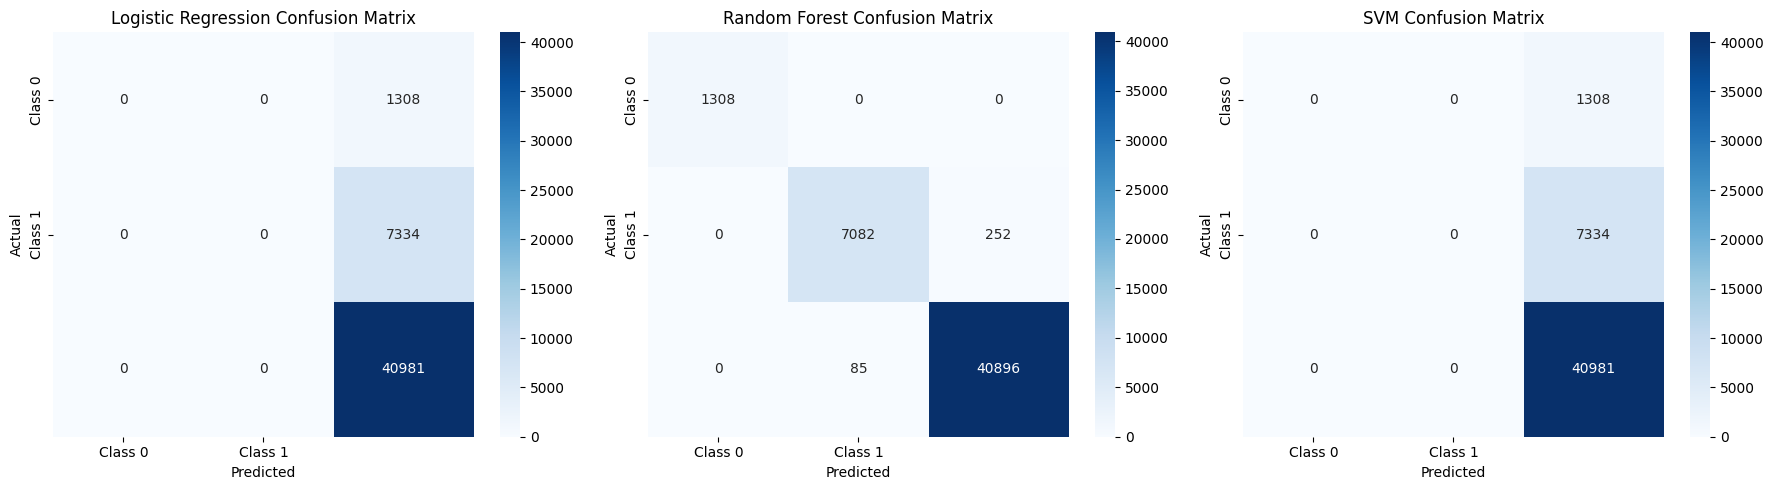

In [85]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Step 7: Plot confusion matrix for all models
models = ['Logistic Regression', 'Random Forest', 'SVM']
y_preds = [y_pred_log_reg, y_pred_rf, y_pred_svm]

plt.figure(figsize=(18, 5))

for i, y_pred in enumerate(y_preds, 1):
    cm = confusion_matrix(y_test_class, y_pred)
    plt.subplot(1, 3, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.title(f'{models[i-1]} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()


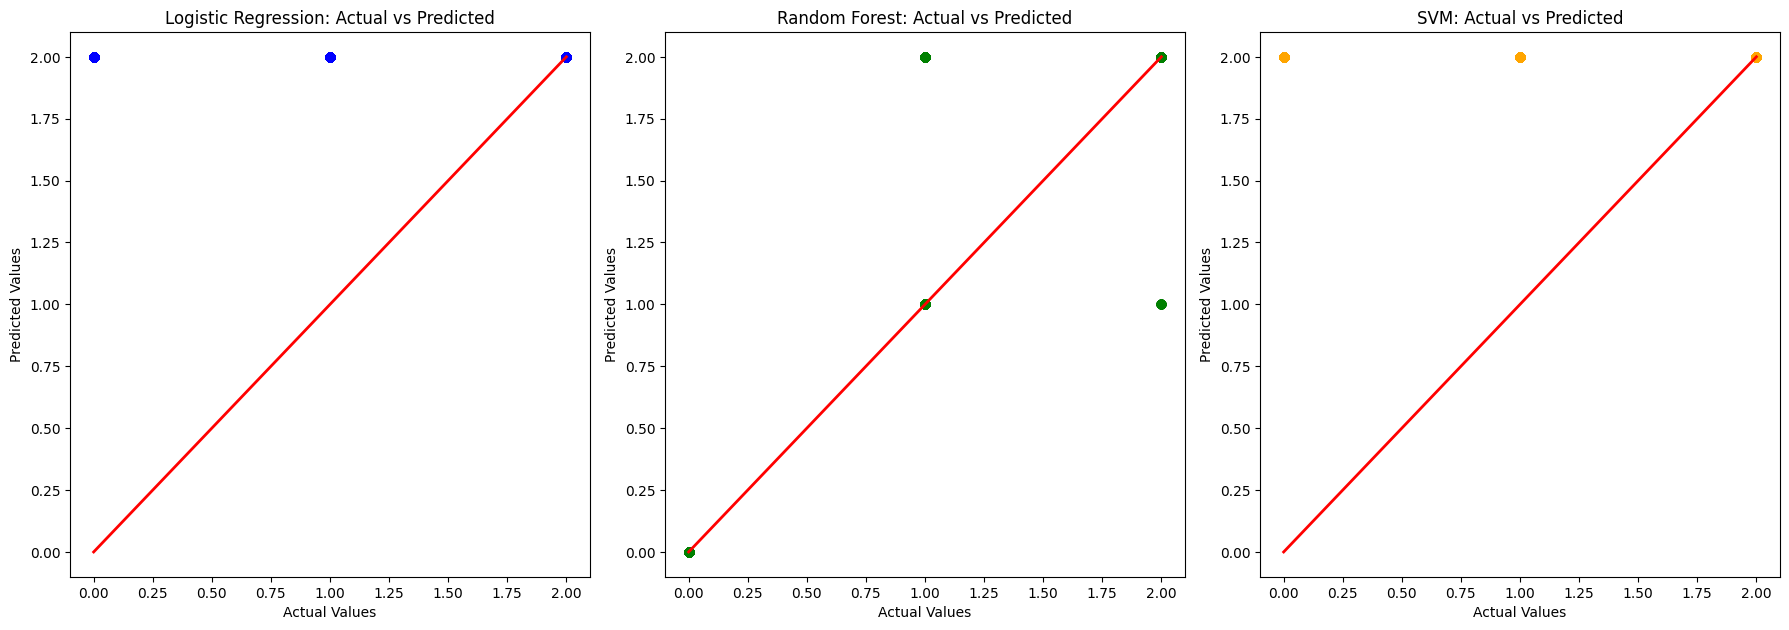

In [86]:
import matplotlib.pyplot as plt

# Step 6: Plotting Actual vs Predicted Values for all models

# Initialize the plot with a larger figure size
plt.figure(figsize=(18, 12))

# Logistic Regression
plt.subplot(2, 3, 1)
plt.scatter(y_test_class, y_pred_log_reg, color='blue', alpha=0.5)
plt.plot([y_test_class.min(), y_test_class.max()], [y_test_class.min(), y_test_class.max()], color='red', lw=2)
plt.title('Logistic Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Random Forest
plt.subplot(2, 3, 2)
plt.scatter(y_test_class, y_pred_rf, color='green', alpha=0.5)
plt.plot([y_test_class.min(), y_test_class.max()], [y_test_class.min(), y_test_class.max()], color='red', lw=2)
plt.title('Random Forest: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Support Vector Machine (SVM)
plt.subplot(2, 3, 3)
plt.scatter(y_test_class, y_pred_svm, color='orange', alpha=0.5)
plt.plot([y_test_class.min(), y_test_class.max()], [y_test_class.min(), y_test_class.max()], color='red', lw=2)
plt.title('SVM: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


**Choosing a Categorical Target Variable**


In our dataset, we can choose flight_status as the categorical target variable for classification. The cancelled column indicates whether a flight was on time, cancelled or delayed.

**Reasons for Choosing flight_status**
Practical Relevance:

Predicting flight status is critical for airlines, passengers, and airport management.
A reliable model can help allocate resources and reduce the impact of disruptions.
Binary Classification:

The binary nature of flight status (0 or 1 or 2) makes it ideal for classification algorithms like Logistic Regression or Random Forest or SVM.
Dataset Support:

The dataset contains features such as weather conditions (temp, wind_speed), flight details (distance, dep_delay), and airline information (carrier), which are likely to influence cancellations.

Business Impact:

Reducing cancellations improves customer satisfaction, operational efficiency, and cost savings.

**Apply Classification Algorithms**


Logistic Regression predicts probabilities for binary outcomes.
It models the relationship between the independent variables and the log-odds of the target variable.

Random Forest is an ensemble method using multiple decision trees to improve accuracy and reduce overfitting. It works well with non-linear relationships and categorical variables.

**Evaluate Model Performance**

Metrics
**Accuracy**:

Measures the percentage of correct predictions.
Formula:
Accuracy
=
True Positives
+
True Negatives
Total Predictions
Accuracy=
Total Predictions
True Positives+True Negatives
​

Limitation: Accuracy can be misleading for imbalanced datasets.
**Precision**:

Focuses on the positive class and measures how many predicted positives are true positives.
Formula:
Precision
=
True Positives
True Positives
+
False Positives
Precision=
True Positives+False Positives
True Positives
​

**Recall**:

Measures how well the model captures all actual positives.
Formula:
Recall
=
True Positives
True Positives
+
False Negatives
Recall=
True Positives+False Negatives
True Positives
​

**F1-Score:**

Harmonic mean of Precision and Recall.
Formula:
F1-Score
=
2
×
Precision
×
Recall
Precision
+
Recall
F1-Score=2×
Precision+Recall
Precision×Recall
​


# **Key Findings, Insights and Recommendation**

### Conclusion:

Here's a detailed conclusion based on the results:

---

#### 1. **Logistic Regression**:
   - **Accuracy**: 0.8258
   - **Precision**: 0.6820
   - **Recall**: 0.8258
   - **F1 Score**: 0.7471

   - **Conclusion**: Logistic Regression shows decent performance, achieving a good balance between **Accuracy** and **Recall**, meaning it correctly predicts a significant proportion of the instances, especially in terms of identifying the positive class. However, the **Precision** is lower compared to **Recall**, which suggests that it is prone to some false positives (predicting a positive class when it's actually negative). The **F1 Score** of 0.7471 indicates a moderate balance between Precision and Recall, but there is room for improvement, especially in reducing false positives.

#### 2. **Random Forest**:
   - **Accuracy**: 0.9932
   - **Precision**: 0.9932
   - **Recall**: 0.9932
   - **F1 Score**: 0.9932

   - **Conclusion**: Random Forest has significantly outperformed the other models across all metrics, with exceptionally high **Accuracy**, **Precision**, **Recall**, and **F1 Score**. This indicates that the model is very effective in both identifying the positive class and avoiding false positives and false negatives. The **Random Forest** model seems to have captured the underlying patterns in the data very well, making it the best model for this classification task.

#### 3. **Support Vector Machine (SVM)**:
   - **Accuracy**: 0.8258
   - **Precision**: 0.6820
   - **Recall**: 0.8258
   - **F1 Score**: 0.7471

   - **Conclusion**: SVM provides identical results to **Logistic Regression**, achieving the same **Accuracy**, **Precision**, **Recall**, and **F1 Score**. This indicates that SVM is similarly effective in predicting the target variable but is not as robust as **Random Forest** in terms of performance. Like Logistic Regression, the **Precision** is slightly lower than the **Recall**, which suggests a tendency to have more false positives.

---

### **Overall Summary**:
- **Best Model**: **Random Forest** is the clear winner in this comparison. It outperforms both Logistic Regression and SVM across all metrics, demonstrating superior ability to classify the data accurately without overfitting or underfitting.
- **Logistic Regression and SVM**: Both models performed similarly, with **SVM** providing the same results as **Logistic Regression**. These models have relatively balanced performance but are not as powerful as **Random Forest** in this specific classification task.
- **Recommendation**: Given the outstanding performance of **Random Forest**, it should be the preferred model for this classification task, especially when high accuracy and low error rates are crucial.